<a href="https://colab.research.google.com/github/Axafath/Arafath_w1961998_20211613/blob/main/W1961998_20211613_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering and Predicting IIT Student Stress Levels Using Machine Learning**

# **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import skew
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score, davies_bouldin_score, calinski_harabasz_score

# **Loading the Dataset through Google Drive**

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import and store in the df variable
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FYP/IIT_Student Stress_Data.csv')

Mounted at /content/drive


# **Data Preprocessing**

In [3]:
# Show first 5 rows of data
df.head()

,Timestamp,What is your age?,What is your gender?,What is your degree pathway?,Are you currently employed?,What is your acadamic year?,I feel overwhelmed by the academic workload and deadlines.,The pressure to maintain good grades affects my mental well-being.,I often feel stressed about examinations or assessments.,I experience anxiety when participating in class discussions or presentations.,...,My learning environment (classroom or online) negatively affects my mental well-being.,Institutional policies and academic rules increase my stress,The campus environment is not supportive for mental health,Limited access to faculty guidance increases my stress.,The administrative processes at my institution are stressful,Lack of support from friends or family worsens my stress.,"Not engaging in physical activities (sports, exercise) makes it harder to manage stress.","I struggle to use relaxation techniques (e.g., deep breathing, meditation) to cope with stress.",I hesitate to seek professional help even when I feel overwhelmed by stress.,I rarely find hobbies helpful in reducing stress.
0,2025/02/28 7:02:52 AM GMT+5:30,Above 24,Female,BDA,Yes,4th year,3,4,4,4,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
1,2025/02/28 6:18:01 PM GMT+5:30,18 to 20,Female,AI & DS,Yes,3rd year,3,3,3,2,...,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,1.0
2,2025/03/02 6:11:35 PM GMT+5:30,20 to 22,Female,CS,Yes,3rd year,4,3,4,4,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
3,2025/03/02 6:13:51 PM GMT+5:30,18 to 20,Male,BIS,No,3rd year,1,1,1,1,...,1.0,1.0,4.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
4,2025/03/02 6:16:41 PM GMT+5:30,20 to 22,Male,BDA,Yes,3rd year,3,2,3,2,...,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0


In [4]:
# Add a 'Number' column starting from 1
df.insert(0, 'Number', range(1, len(df) + 1))

In [5]:
df.head()

,Number,Timestamp,What is your age?,What is your gender?,What is your degree pathway?,Are you currently employed?,What is your acadamic year?,I feel overwhelmed by the academic workload and deadlines.,The pressure to maintain good grades affects my mental well-being.,I often feel stressed about examinations or assessments.,...,My learning environment (classroom or online) negatively affects my mental well-being.,Institutional policies and academic rules increase my stress,The campus environment is not supportive for mental health,Limited access to faculty guidance increases my stress.,The administrative processes at my institution are stressful,Lack of support from friends or family worsens my stress.,"Not engaging in physical activities (sports, exercise) makes it harder to manage stress.","I struggle to use relaxation techniques (e.g., deep breathing, meditation) to cope with stress.",I hesitate to seek professional help even when I feel overwhelmed by stress.,I rarely find hobbies helpful in reducing stress.
0,1,2025/02/28 7:02:52 AM GMT+5:30,Above 24,Female,BDA,Yes,4th year,3,4,4,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
1,2,2025/02/28 6:18:01 PM GMT+5:30,18 to 20,Female,AI & DS,Yes,3rd year,3,3,3,...,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,1.0
2,3,2025/03/02 6:11:35 PM GMT+5:30,20 to 22,Female,CS,Yes,3rd year,4,3,4,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
3,4,2025/03/02 6:13:51 PM GMT+5:30,18 to 20,Male,BIS,No,3rd year,1,1,1,...,1.0,1.0,4.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
4,5,2025/03/02 6:16:41 PM GMT+5:30,20 to 22,Male,BDA,Yes,3rd year,3,2,3,...,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0


### **Removal of non-contributory columns**

In [6]:
# Drop the first column (timestamp)
df = df.drop(df.columns[1], axis=1)

### **Renaming and structuring**

In [7]:
# Renaming the demographic columns
df.columns.values[1] = "Age"
df.columns.values[2] = "Gender"
df.columns.values[3] = "Field_of_Study"
df.columns.values[4] = "Employment_Status"
df.columns.values[5] = "Academic_Year"

# Renaming the stress columns to Q1, Q2, Q3, ...
for i in range(6, len(df.columns)):
    df.columns.values[i] = f"Q{i - 5}"

print(df.head())

   Number       Age  Gender Field_of_Study Employment_Status Academic_Year  \
0       1  Above 24  Female            BDA               Yes      4th year   
1       2  18 to 20  Female        AI & DS               Yes      3rd year   
2       3  20 to 22  Female             CS               Yes      3rd year   
3       4  18 to 20    Male            BIS                No      3rd year   
4       5  20 to 22    Male            BDA               Yes      3rd year   

   Q1  Q2  Q3  Q4  ...  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  
0   3   4   4   4  ...  1.0  1.0  3.0  1.0  1.0  1.0  1.0  3.0  1.0  1.0  
1   3   3   3   2  ...  3.0  1.0  3.0  3.0  2.0  2.0  3.0  2.0  3.0  1.0  
2   4   3   4   4  ...  3.0  3.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  2.0  
3   1   1   1   1  ...  1.0  1.0  4.0  1.0  4.0  2.0  1.0  1.0  1.0  1.0  
4   3   2   3   2  ...  2.0  2.0  3.0  3.0  3.0  2.0  3.0  3.0  3.0  3.0  

[5 rows x 33 columns]


In [8]:
# Show first 5 rows of data after renaming
df.head()

,Number,Age,Gender,Field_of_Study,Employment_Status,Academic_Year,Q1,Q2,Q3,Q4,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,1,Above 24,Female,BDA,Yes,4th year,3,4,4,4,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
1,2,18 to 20,Female,AI & DS,Yes,3rd year,3,3,3,2,...,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,1.0
2,3,20 to 22,Female,CS,Yes,3rd year,4,3,4,4,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
3,4,18 to 20,Male,BIS,No,3rd year,1,1,1,1,...,1.0,1.0,4.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
4,5,20 to 22,Male,BDA,Yes,3rd year,3,2,3,2,...,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0


### **Handling missing values**

In [9]:
#to check the sum of missing values
df.isna().sum()

,0
Number,0
Age,0
Gender,0
Field_of_Study,0
Employment_Status,0
Academic_Year,0
Q1,0
Q2,0
Q3,0
Q4,0


In [10]:
# Define columns containing the survey responses (Q1-Q27), excluding demographics
question_cols = [f'Q{i}' for i in range(1, 28)]

# Fill missing values with rounded column mean
df[question_cols] = df[question_cols].fillna(df[question_cols].mean().round())
df[question_cols] = df[question_cols].astype(int)

# Ensure all values stay within 1 to 4
df[question_cols] = df[question_cols].clip(lower=1, upper=4)

In [11]:
#to check the sum of missing values after handling
df.isna().sum()

,0
Number,0
Age,0
Gender,0
Field_of_Study,0
Employment_Status,0
Academic_Year,0
Q1,0
Q2,0
Q3,0
Q4,0


In [12]:
#to check the sum of missing values after handling it
df.isna().sum()

,0
Number,0
Age,0
Gender,0
Field_of_Study,0
Employment_Status,0
Academic_Year,0
Q1,0
Q2,0
Q3,0
Q4,0


### **Handling uniform(inactive) responses**

In [13]:
# Remove rows with uniform responses
initial_rows = df.shape[0]
df = df[df[question_cols].nunique(axis=1) > 1]
removed_rows = initial_rows - df.shape[0]
print(f"{removed_rows} rows removed due to uniform responses.")

15 rows removed due to uniform responses.


### **Skewness & transformation**

In [14]:
# Seperating the numerical varaible
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculating and printing skewness for each numeric variable
for feature in numeric_cols:
    feature_skewness = skew(df[feature])
    print(f"Skewness of {feature}: {feature_skewness:.2f}")

Skewness of Number: 0.04
Skewness of Q1: -0.16
Skewness of Q2: -0.26
Skewness of Q3: -0.33
Skewness of Q4: 0.12
Skewness of Q5: 0.60
Skewness of Q6: 0.58
Skewness of Q7: 0.68
Skewness of Q8: 0.55
Skewness of Q9: 0.58
Skewness of Q10: 0.32
Skewness of Q11: 0.51
Skewness of Q12: 0.73
Skewness of Q13: -0.01
Skewness of Q14: -0.24
Skewness of Q15: -0.02
Skewness of Q16: 0.00
Skewness of Q17: 0.12
Skewness of Q18: 0.44
Skewness of Q19: 0.17
Skewness of Q20: -0.03
Skewness of Q21: -0.03
Skewness of Q22: 0.05
Skewness of Q23: 0.44
Skewness of Q24: -0.11
Skewness of Q25: 0.10
Skewness of Q26: -0.01
Skewness of Q27: 0.20


No variables have been identified with a high skew, therefore skew transformation is not necessary

### **Standard Scaler**

In [15]:
#Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

### **Correlation Matrix**

In [16]:
# Calculate the correlation matrix
corr_matrix = df[question_cols].corr()

correlation_threshold_pairwise = 0.8

# list of features that would be removed
features_removed = set()

# Start from the upper triangle to avoid duplicate pairs and self-correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold_pairwise:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]

            features_removed.add(colname_i)


# list of features that would remain
all_features = set(question_cols)
features_kept = list(all_features - features_removed)

# Print the results
print(f"Features removed (threshold > {correlation_threshold_pairwise}): {list(features_removed)}")
print(f"\nFeatures remained: {features_kept}")

Features removed (threshold > 0.8): []

Features remained: ['Q1', 'Q26', 'Q19', 'Q9', 'Q22', 'Q3', 'Q20', 'Q6', 'Q13', 'Q4', 'Q17', 'Q7', 'Q11', 'Q16', 'Q18', 'Q8', 'Q14', 'Q23', 'Q12', 'Q2', 'Q21', 'Q5', 'Q27', 'Q10', 'Q24', 'Q25', 'Q15']


### **Feature Variance Analysis**

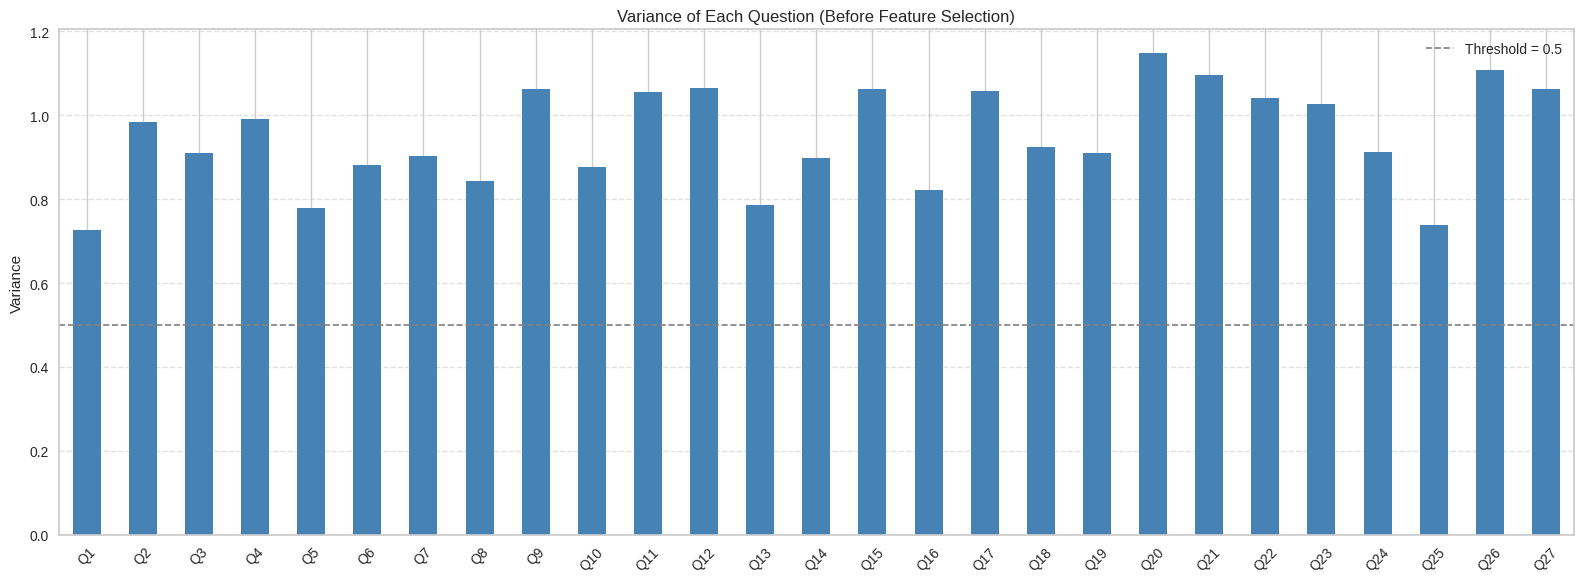

In [17]:
# Calculate variance for each question
variances = df[question_cols].var()

threshold = 0.5

# Plot
plt.figure(figsize=(16, 6))
variances.plot(kind='bar', color='steelblue')
plt.axhline(y=threshold, color='gray', linestyle='--', linewidth=1.2, label=f'Threshold = {threshold}')
plt.title("Variance of Each Question (Before Feature Selection)")
plt.ylabel("Variance")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Note: No features were removed during feature scaling, indicating that all features had a variance over the specified threshold (0.5).

## **Exploratory Data Analysis**

In [18]:
# Basic statistics for numerical columns
print(df.describe())

           Number          Q1          Q2          Q3          Q4          Q5  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean    82.212903    2.632258    2.683871    2.806452    2.387097    2.012903   
std     48.262134    0.852950    0.991882    0.954121    0.996012    0.882640   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     40.000000    2.000000    2.000000    2.000000    2.000000    1.000000   
50%     82.000000    3.000000    3.000000    3.000000    2.000000    2.000000   
75%    122.500000    3.000000    3.000000    4.000000    3.000000    2.500000   
max    170.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

              Q6          Q7         Q8          Q9  ...         Q18  \
count  155.00000  155.000000  155.00000  155.000000  ...  155.000000   
mean     2.03871    1.980645    2.00000    2.051613  ...    2.193548   
std      0.93894    0.949853    0.91878    1.030657  .

In [19]:
#Feature Engineering: Average of each section for EDA (Academic, Financial, Social...)

# Calculate average stress levels for each section
df['Academic_Stress_Avg'] = df[['Q1', 'Q2', 'Q3', 'Q4']].mean(axis=1)
df['Social_Stress_Avg'] = df[['Q5', 'Q6', 'Q7', 'Q8']].mean(axis=1)
df['Financial_Stress_Avg'] = df[['Q9', 'Q10', 'Q11', 'Q12']].mean(axis=1)
df['Personal_Stress_Avg'] = df[['Q13', 'Q14', 'Q15', 'Q16', 'Q17']].mean(axis=1)
df['Environmental_Stress_Avg'] = df[['Q18', 'Q19', 'Q20', 'Q21', 'Q22']].mean(axis=1)
df['Coping_Strategies_Avg'] = df[['Q23', 'Q24', 'Q25', 'Q26', 'Q27']].mean(axis=1)

### **Average Stress Level By Category**

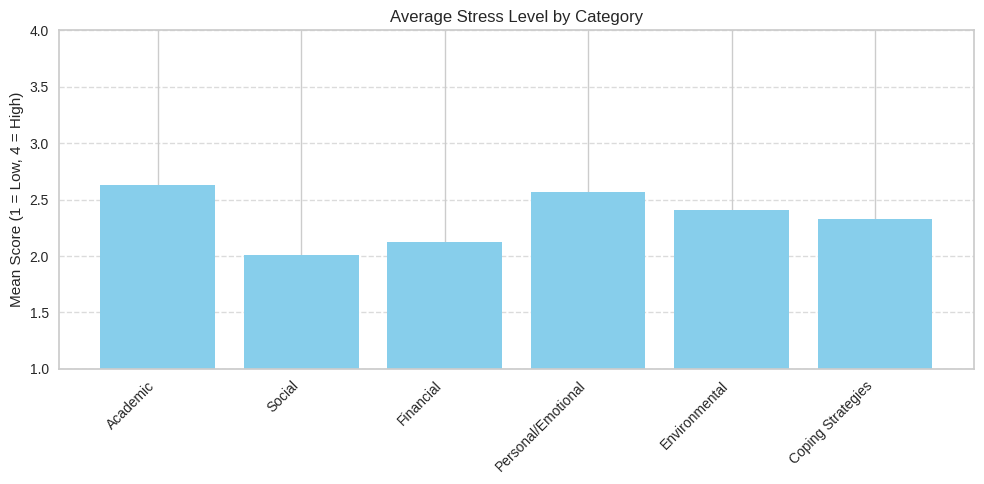

In [20]:
# Create a dictionary of stress categories and their mean values
avg_stress = {
    'Academic': df['Academic_Stress_Avg'].mean(),
    'Social': df['Social_Stress_Avg'].mean(),
    'Financial': df['Financial_Stress_Avg'].mean(),
    'Personal/Emotional': df['Personal_Stress_Avg'].mean(),
    'Environmental': df['Environmental_Stress_Avg'].mean(),
    'Coping Strategies': df['Coping_Strategies_Avg'].mean()
}

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(avg_stress.keys(), avg_stress.values(), color='skyblue')
plt.title('Average Stress Level by Category')
plt.ylabel('Mean Score (1 = Low, 4 = High)')
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  #
plt.show()

### **Distirbution of responses by Demographics**

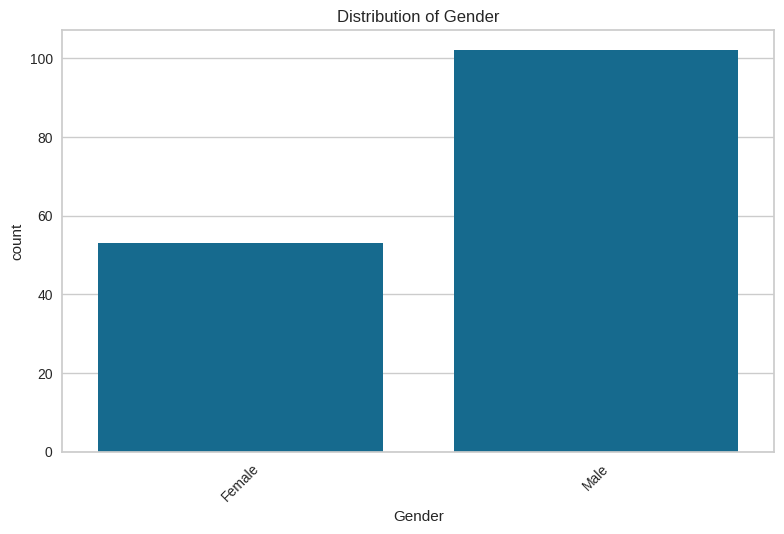

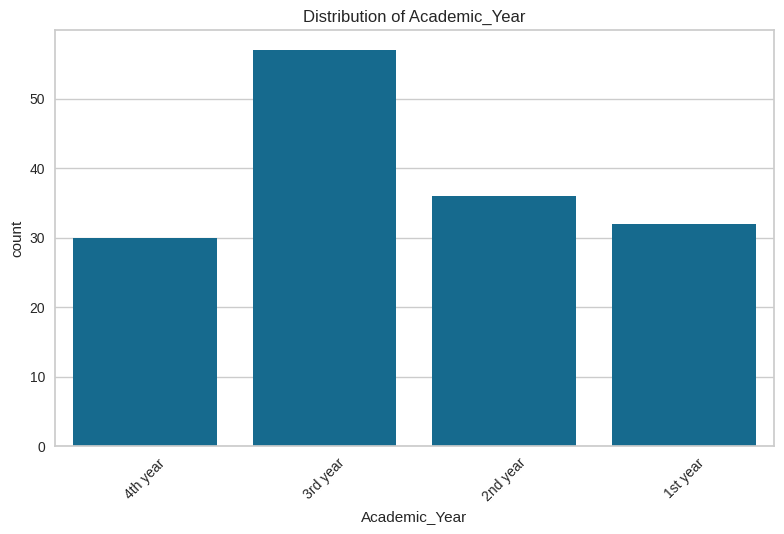

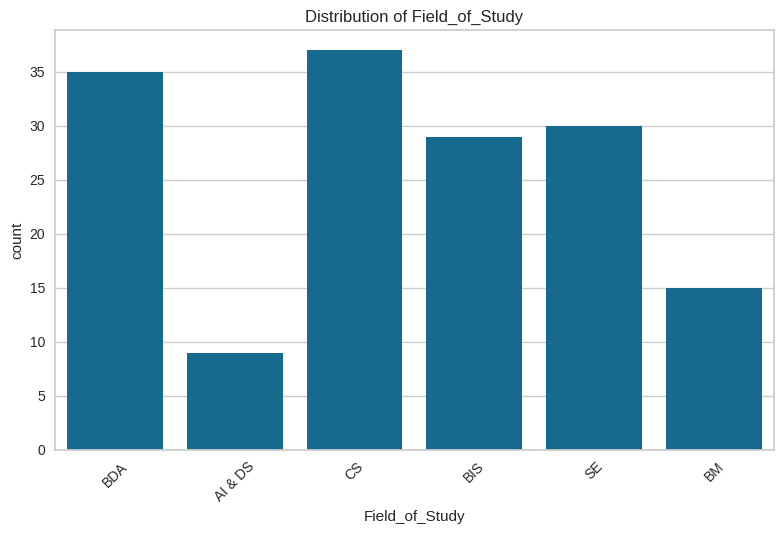

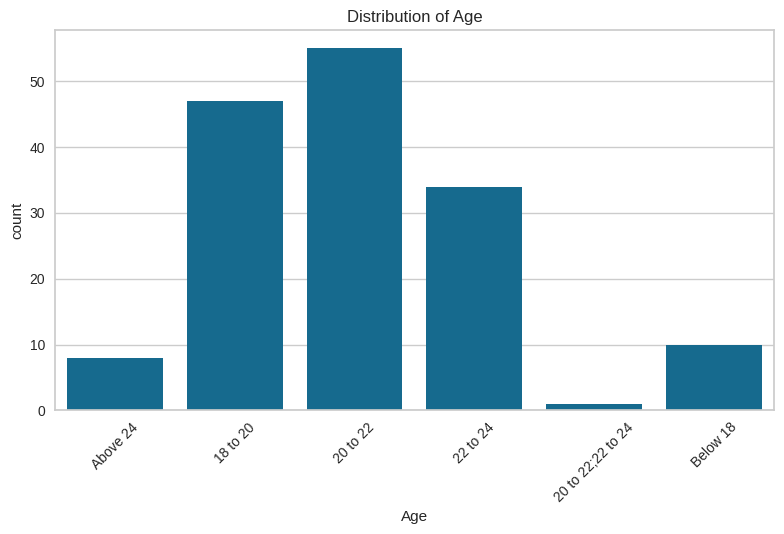

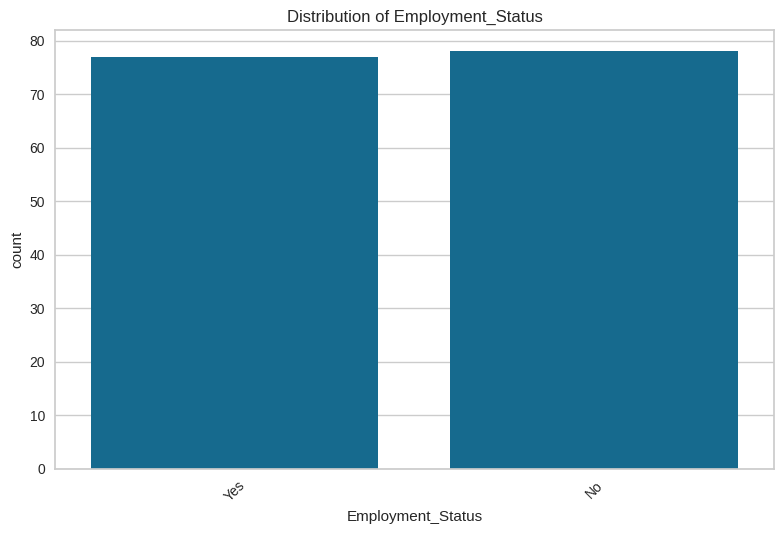

In [21]:
for col in ['Gender', 'Academic_Year', 'Field_of_Study', 'Age', 'Employment_Status']:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Distribution of each question**

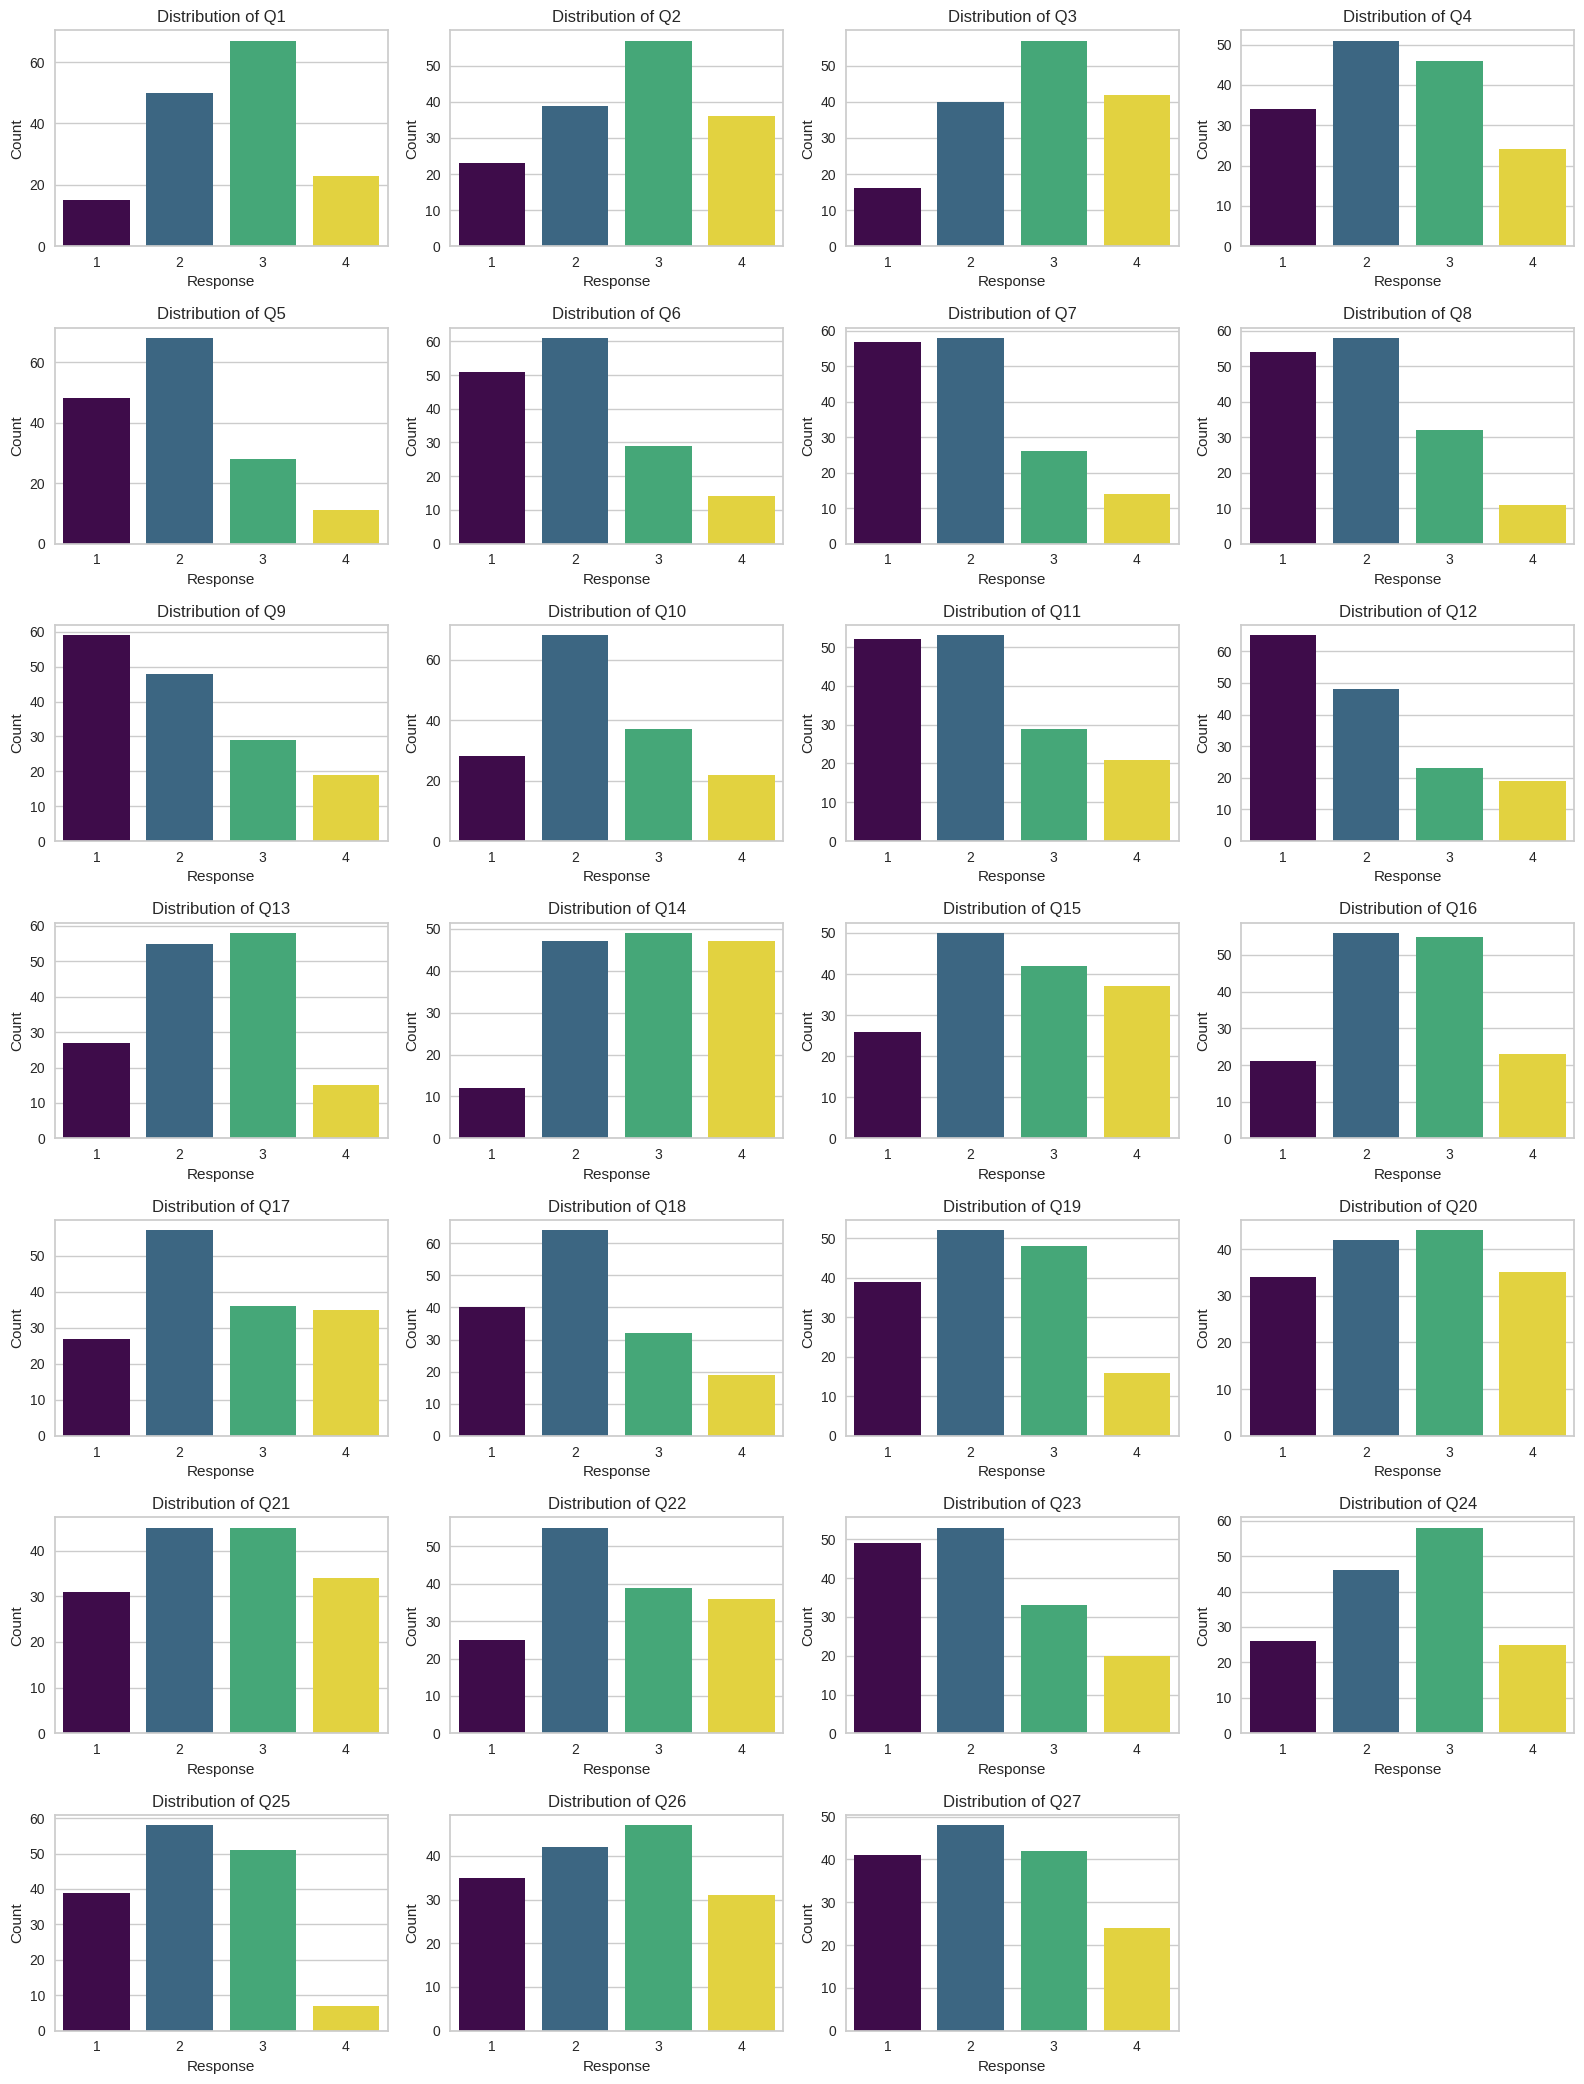

In [22]:
# Plot all question distributions together
n_cols_plot = 4
n_rows_plot = math.ceil(len(question_cols) / n_cols_plot)
fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(n_cols_plot * 4, n_rows_plot * 3))
axes = axes.flatten()

for i, col in enumerate(question_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### **Distribution of Stress Levels by Each Section (Academic, Financial, etc..)**

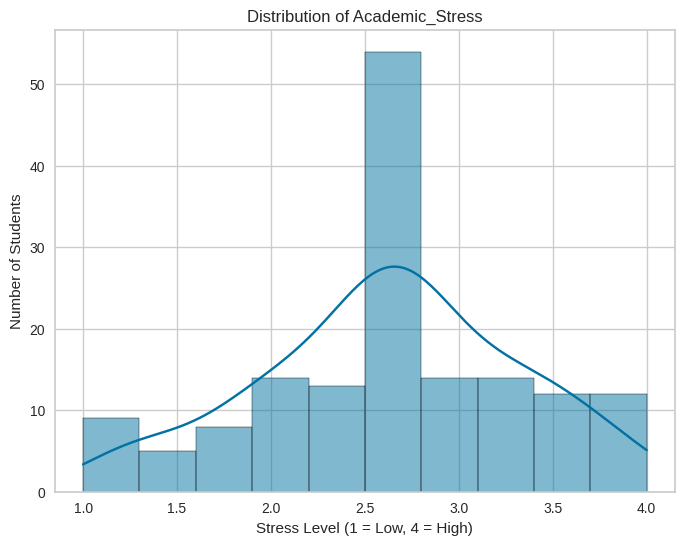

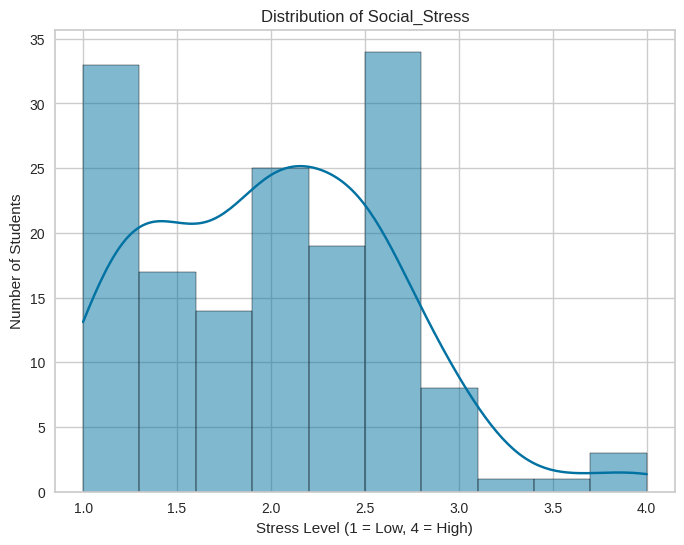

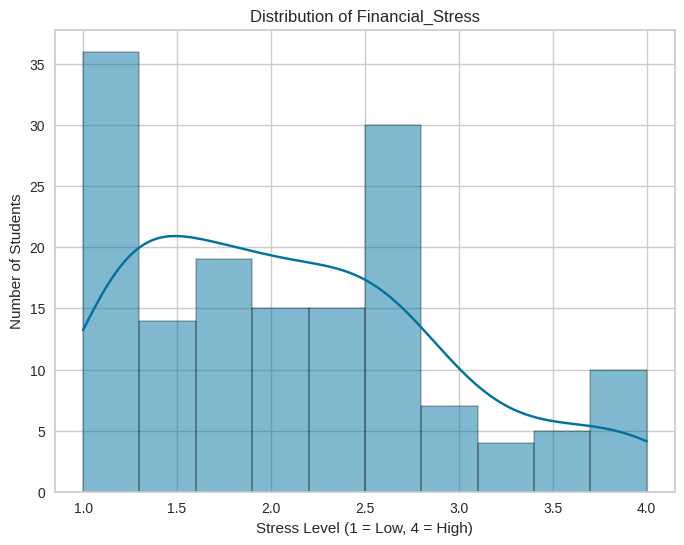

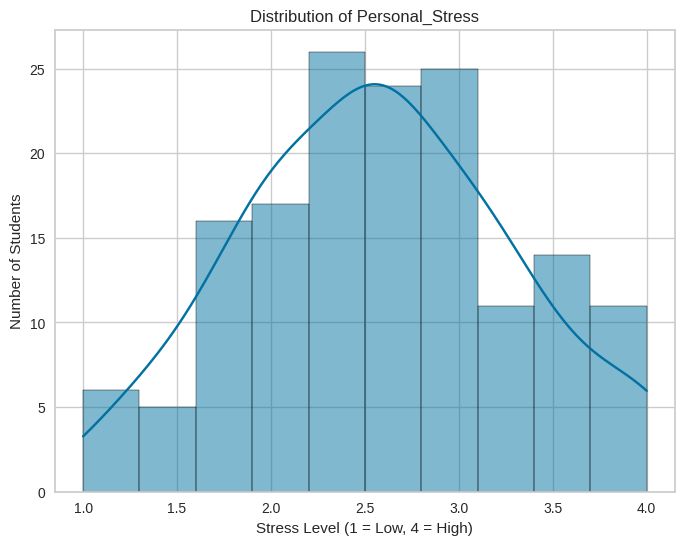

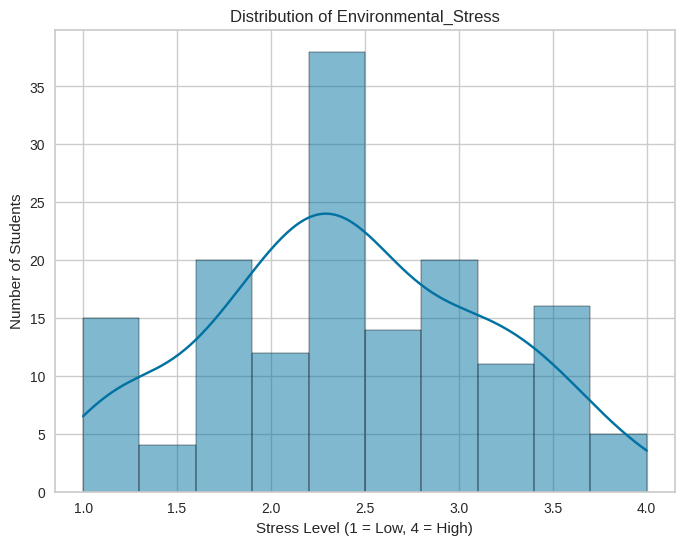

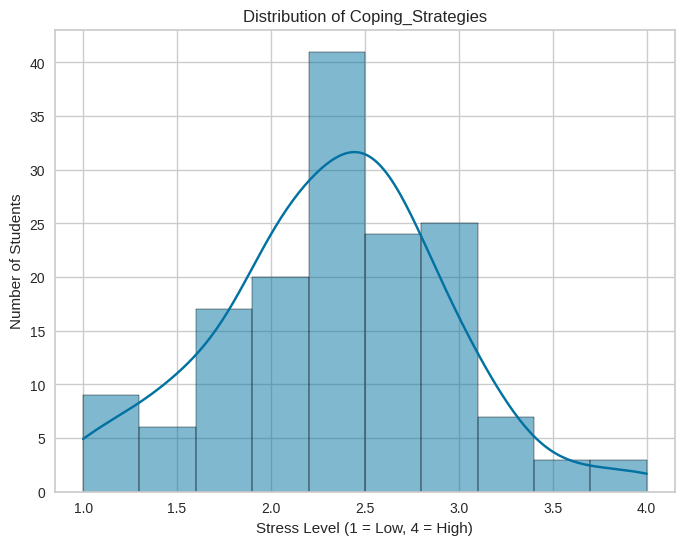

In [23]:
stress_columns = ["Academic_Stress_Avg", "Social_Stress_Avg", "Financial_Stress_Avg", "Personal_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f"Distribution of {column.replace('_Avg', '')}")
    plt.xlabel("Stress Level (1 = Low, 4 = High)")
    plt.ylabel("Number of Students")
    plt.show()

### **Distribution of Stress Levels By Gender**

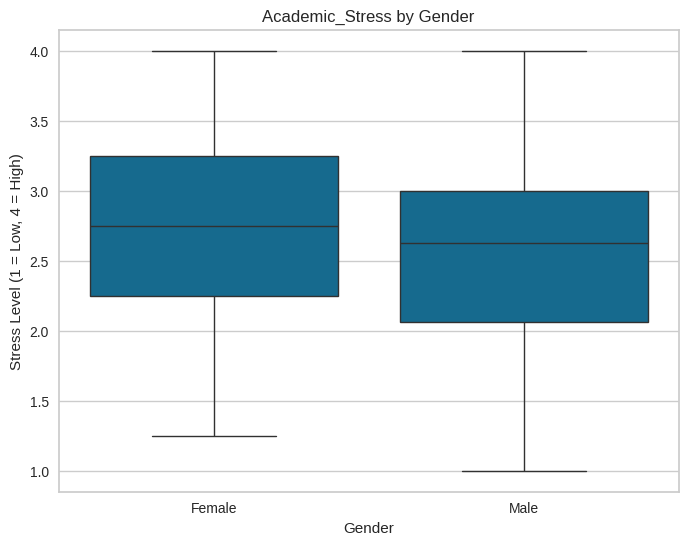

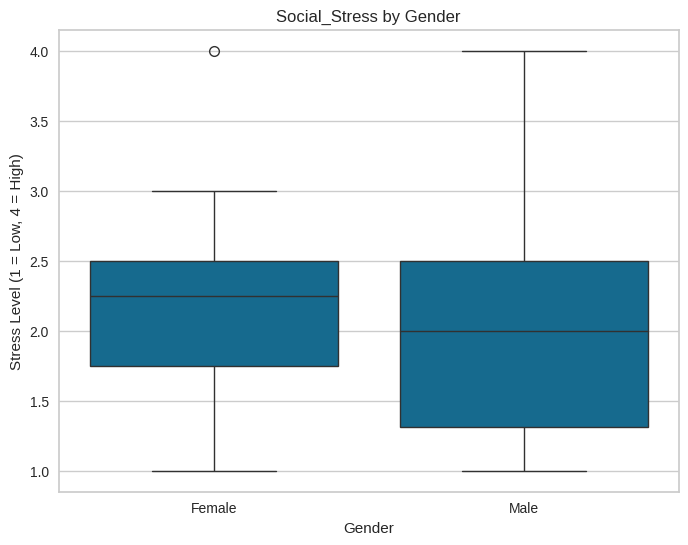

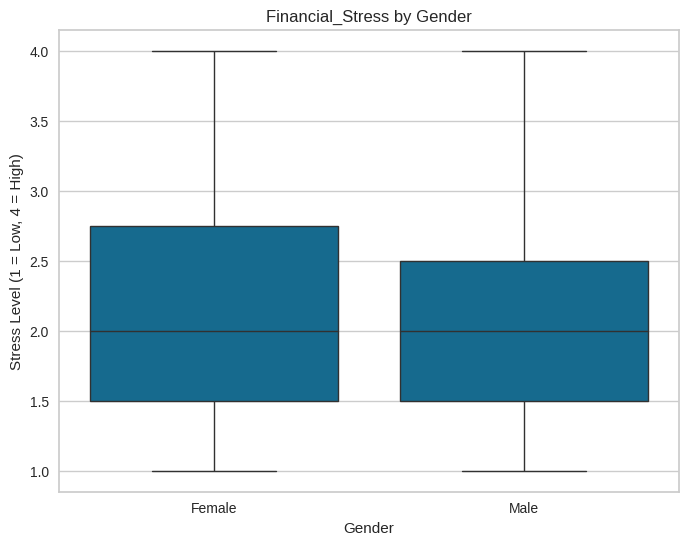

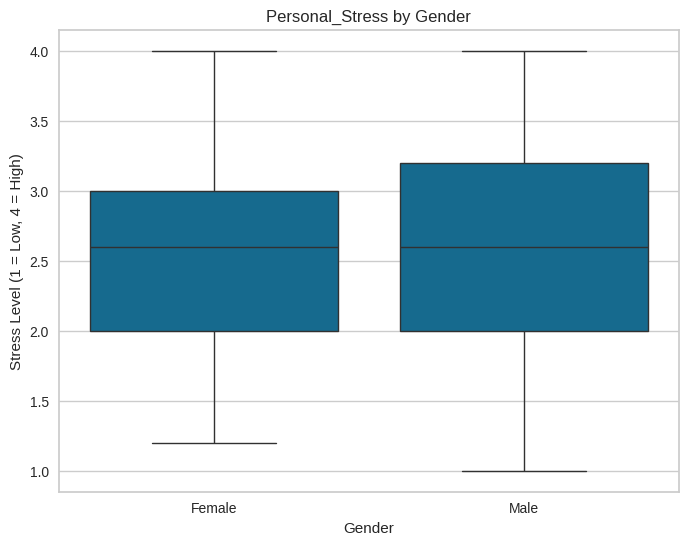

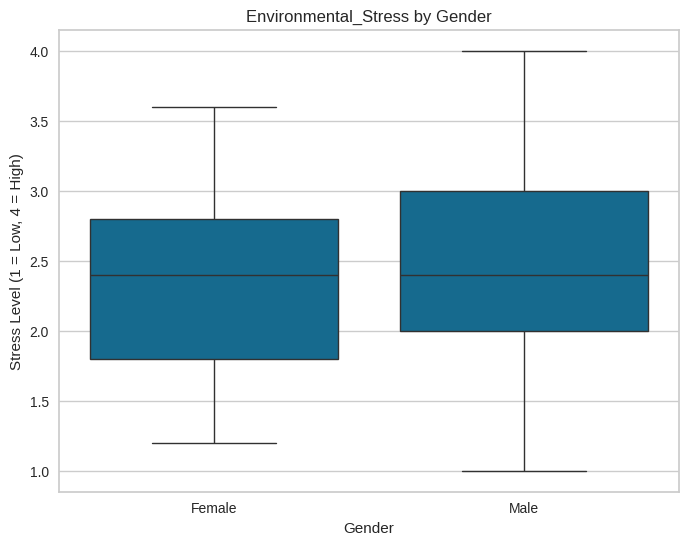

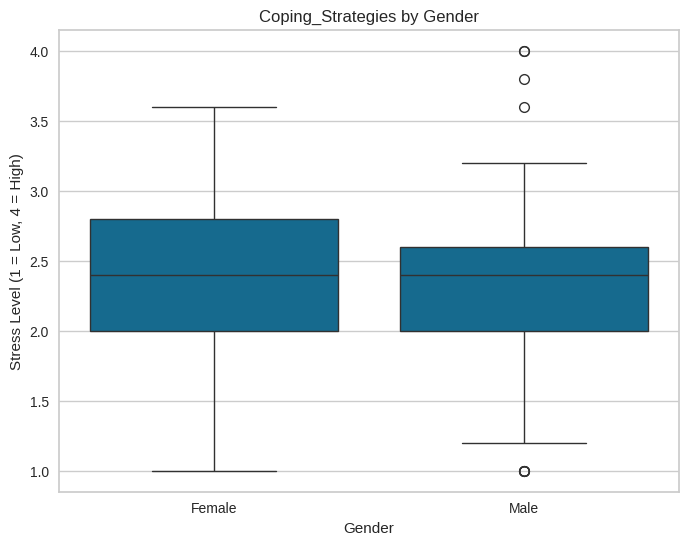

In [24]:
for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Gender", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.show()

### **Distribution of Stress Levels By Academic Year**

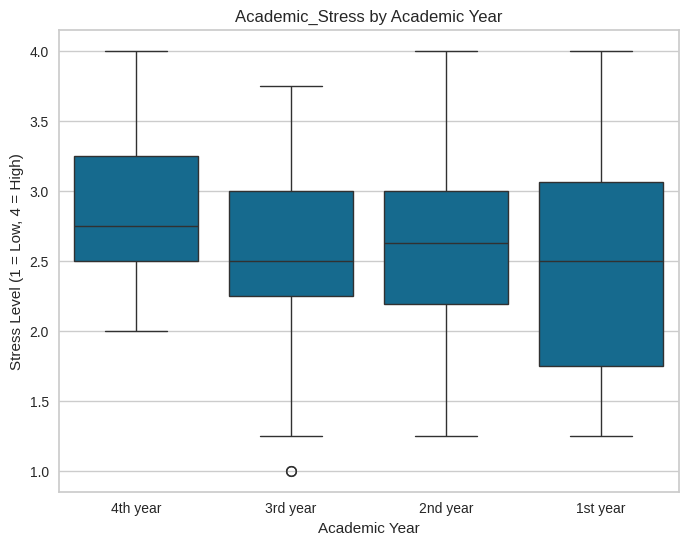

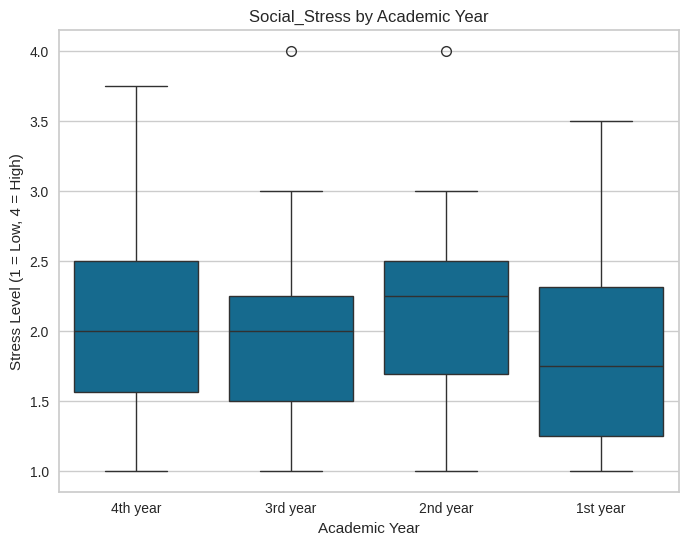

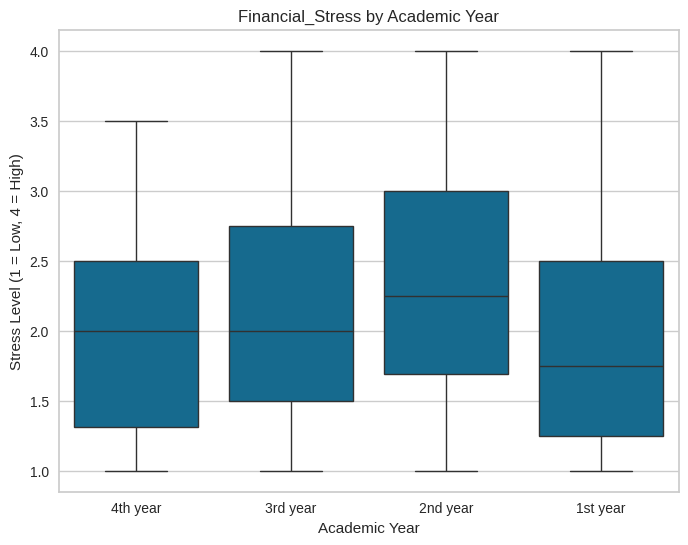

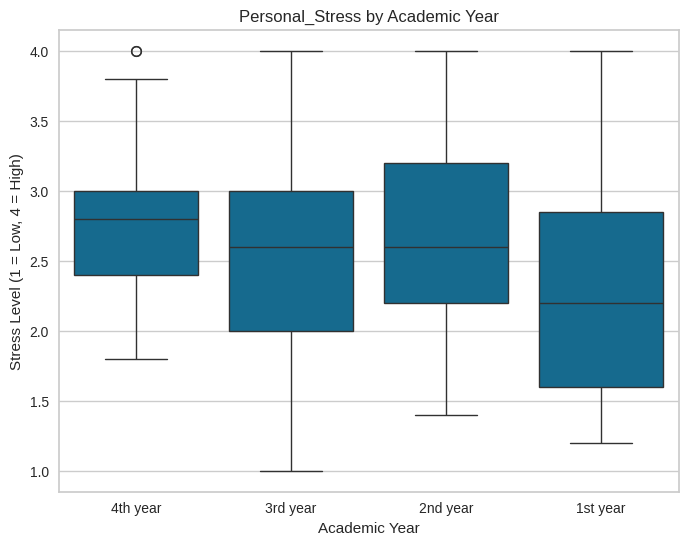

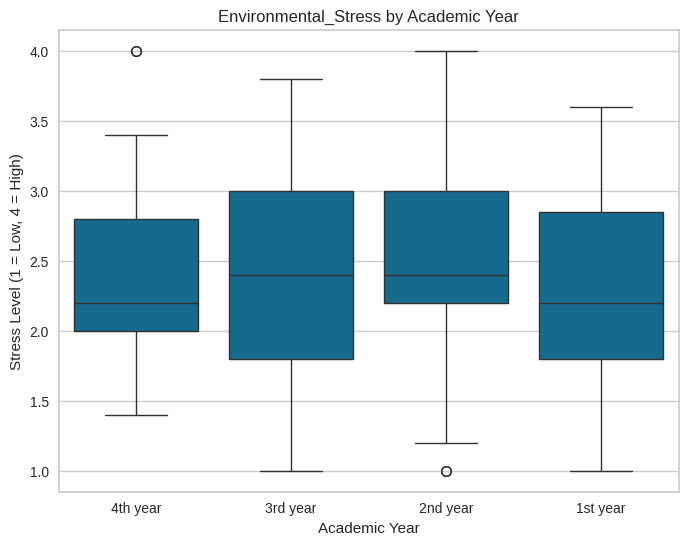

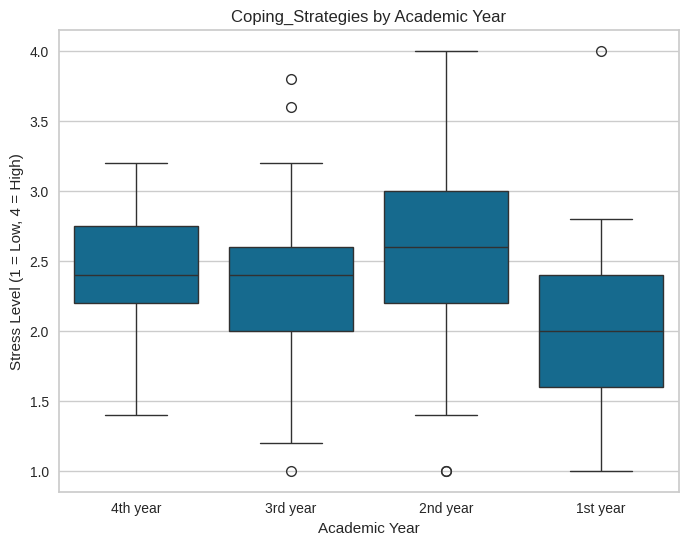

In [25]:
for column in stress_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Academic_Year", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Academic Year")
    plt.xlabel("Academic Year")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.show()

### **Distribution of Stress Levels By Degree Pathway**

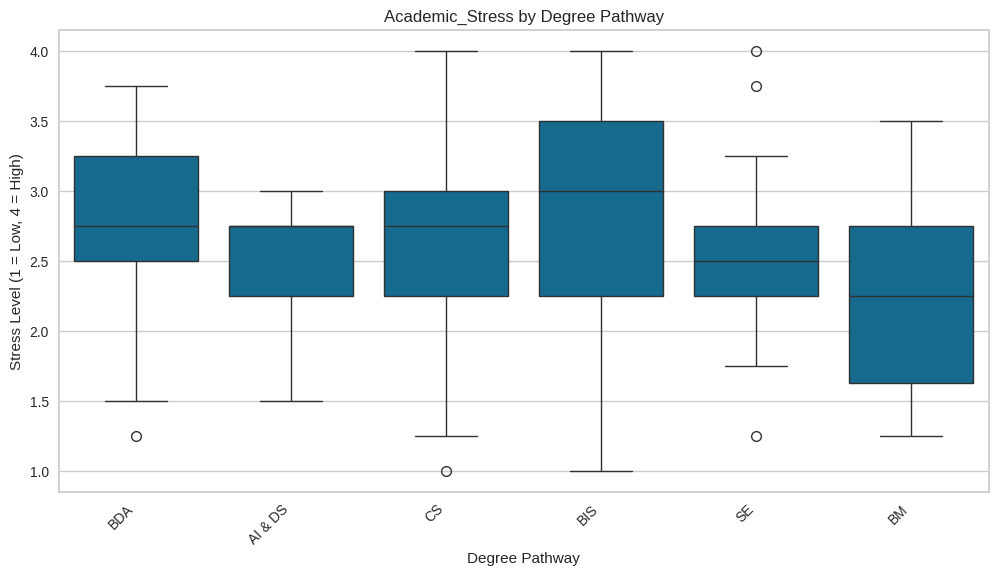

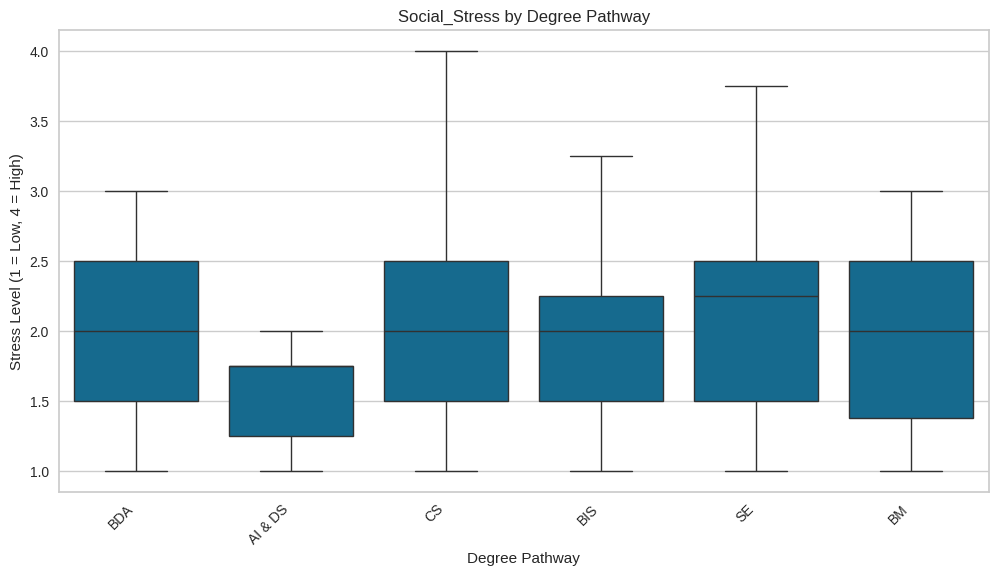

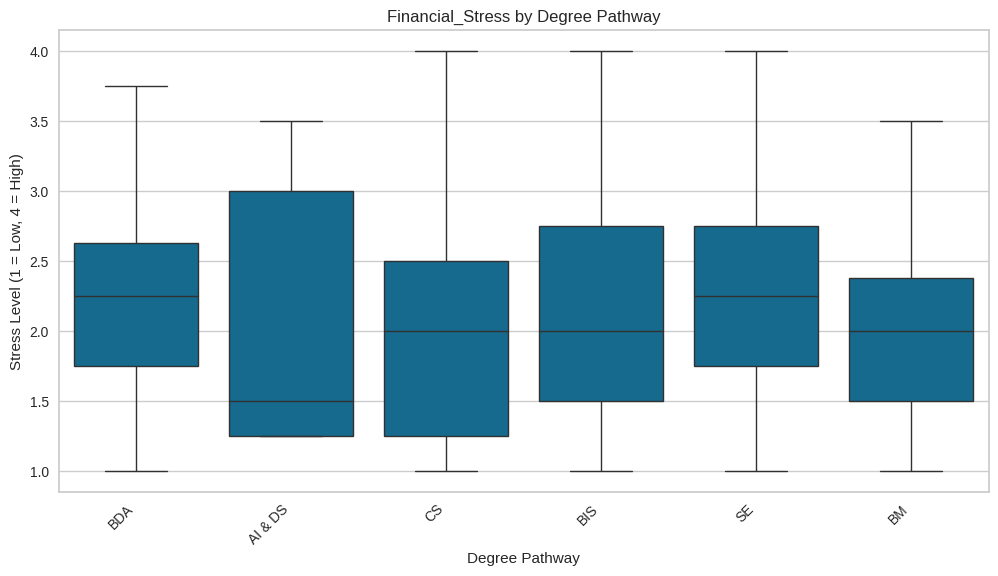

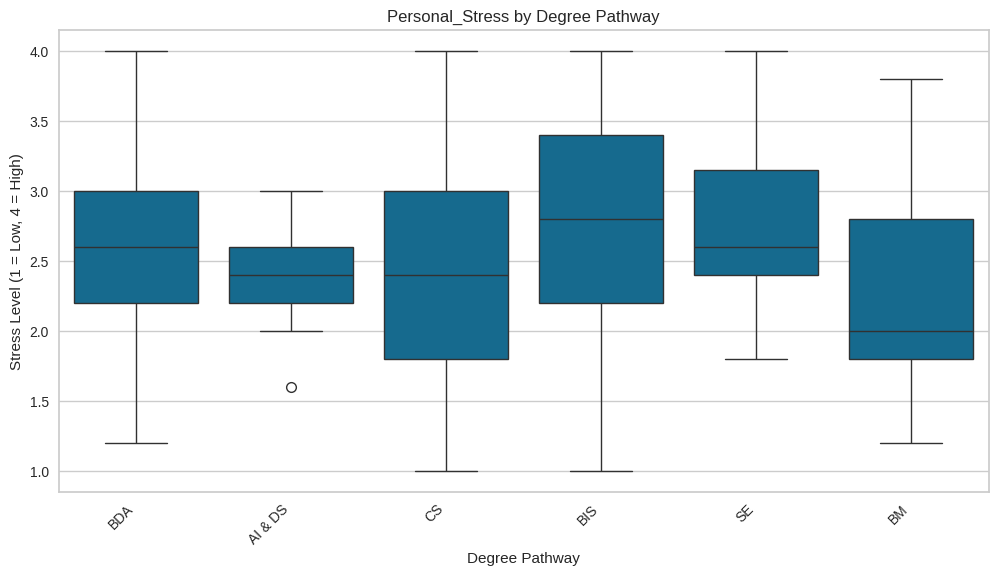

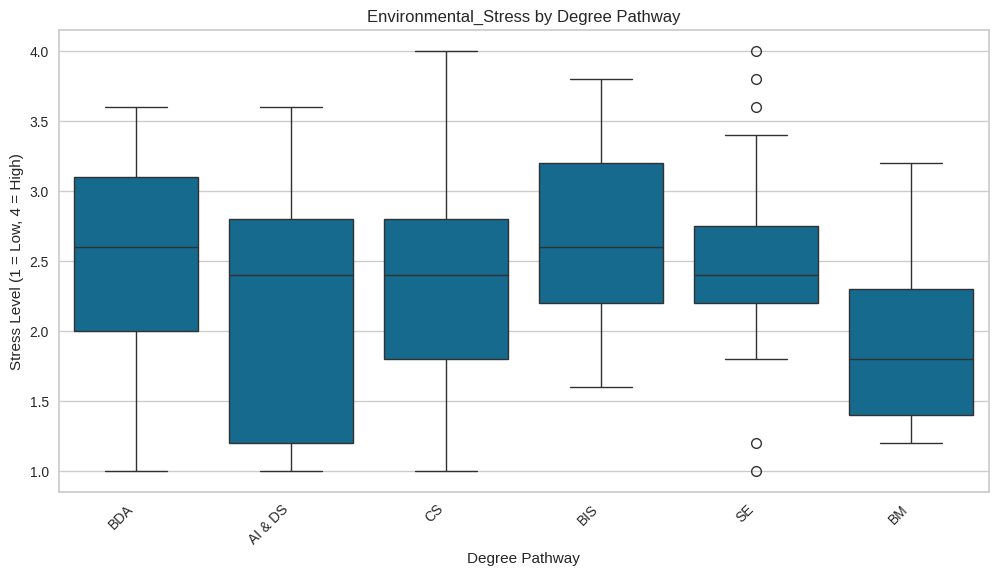

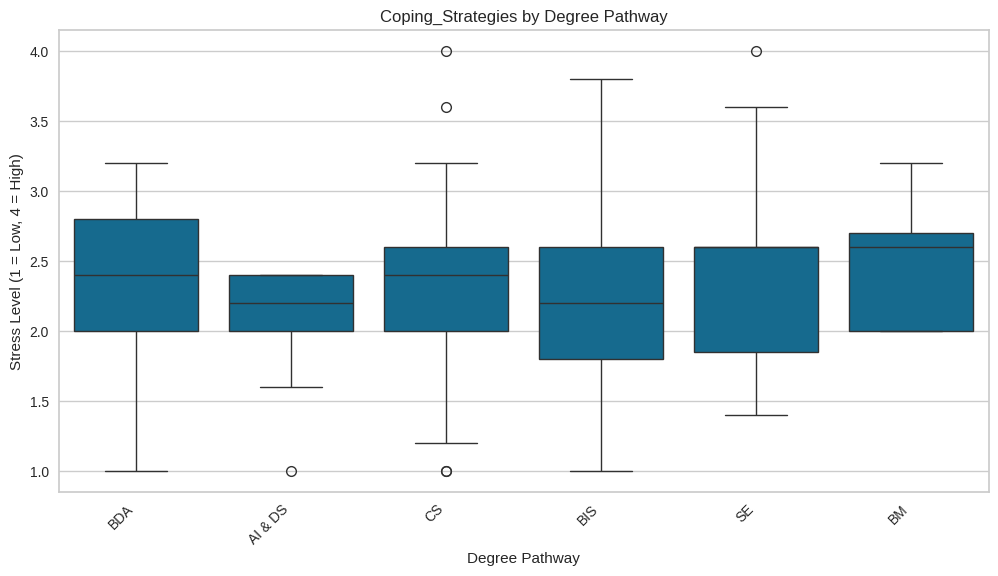

In [26]:
for column in stress_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Field_of_Study", y=column, data=df)
    plt.title(f"{column.replace('_Avg', '')} by Degree Pathway")
    plt.xlabel("Degree Pathway")
    plt.ylabel("Stress Level (1 = Low, 4 = High)")
    plt.xticks(rotation=45, ha='right')
    plt.show()

### **Correlation between Stress Sections**

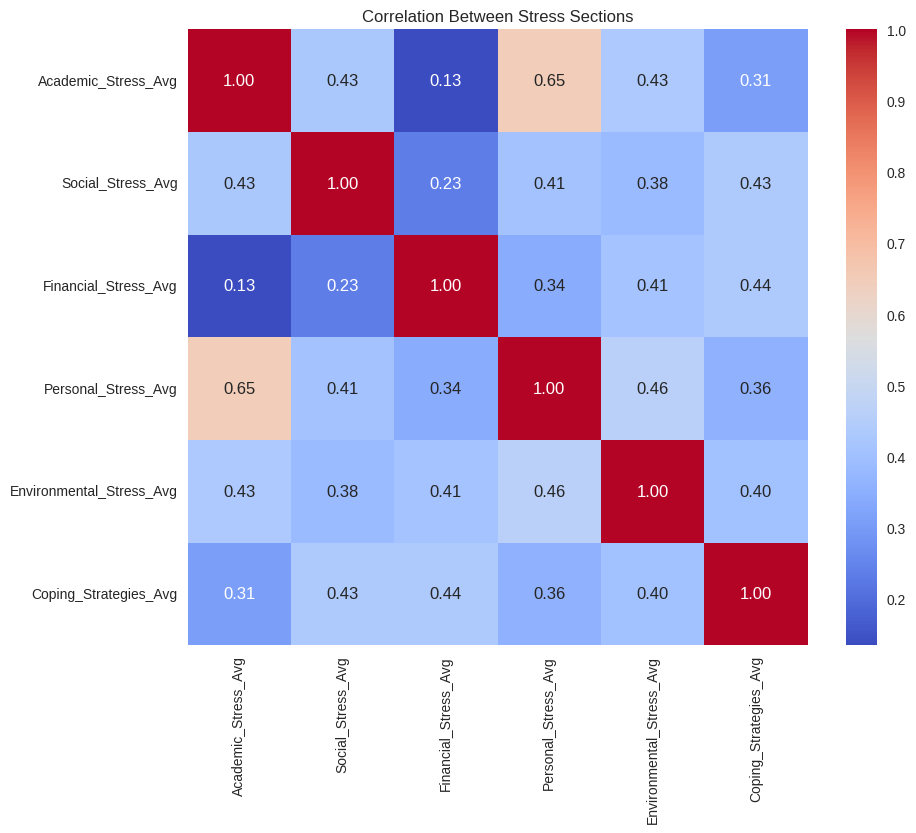

In [27]:
# Correlation matrix for section-wise stress averages
stress_columns = ["Academic_Stress_Avg", "Social_Stress_Avg", "Financial_Stress_Avg", "Personal_Stress_Avg",
                 "Environmental_Stress_Avg", "Coping_Strategies_Avg"]

corr_matrix = df[stress_columns].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Stress Sections")
plt.show()

### **Correlation heatmap between individual features**



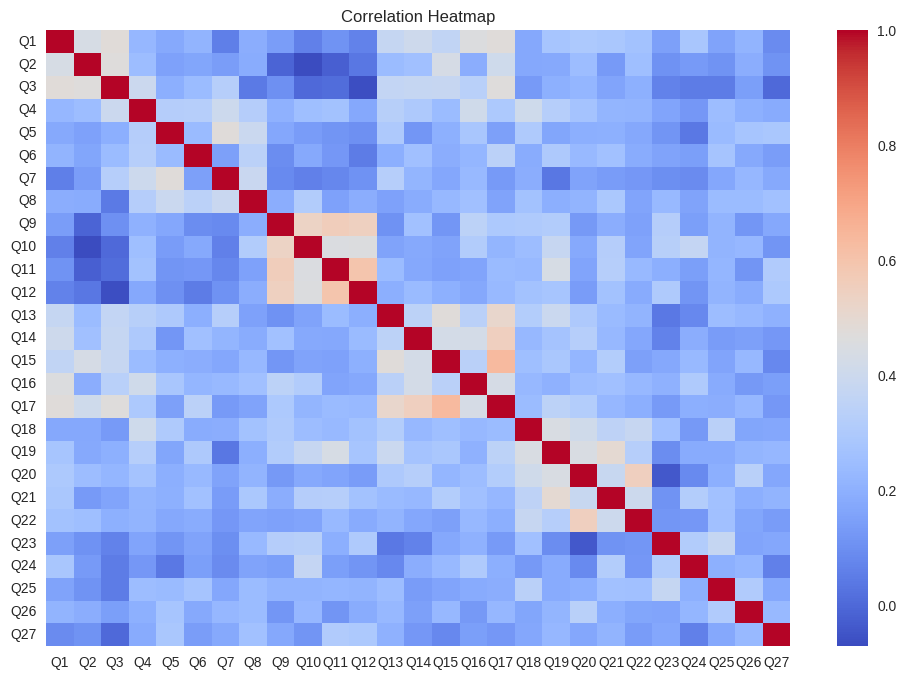

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[question_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **K Means Clustering - Unsupervised ML**

## **Elbow method to determine the number of clusters**

Text(0, 0.5, 'WCSS')

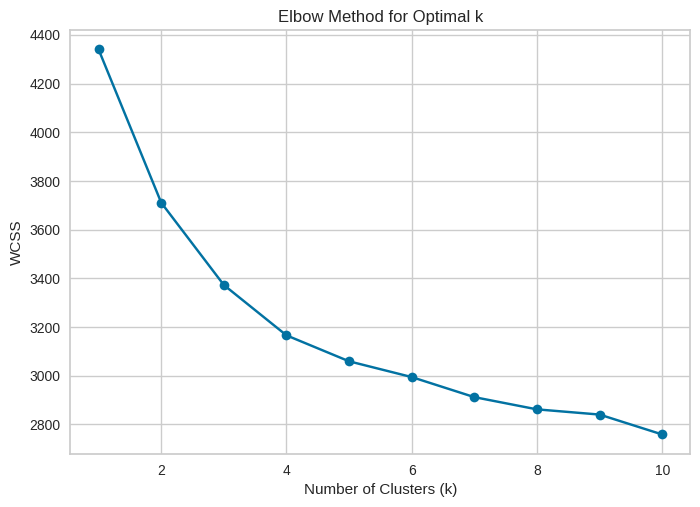

In [29]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

## **Silhouette Analysis to determine the number of clusters**

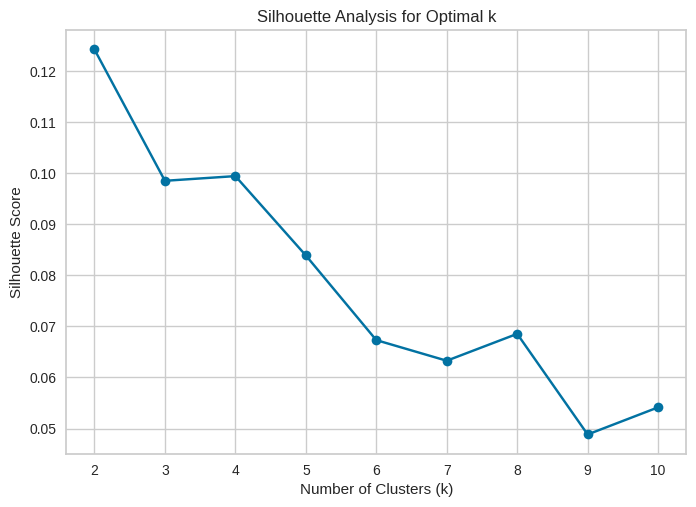

In [30]:
#Silhouette Analysis
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Plotting the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

## **Comparing between 2 or 3 Clusters**

In [31]:
# list to collect results
results = []

# Performing K-means for 2, 3 clusters
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)

    # Scores
    silhouette = silhouette_score(scaled_data, labels)
    dbi = davies_bouldin_score(scaled_data, labels)
    chi = calinski_harabasz_score(scaled_data, labels)

    # Append results
    results.append({
        "k": k,
        "Silhouette Score": round(silhouette, 4),
        "Davies-Bouldin Index": round(dbi, 4),
        "Calinski-Harabasz Index": round(chi, 2)
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

   k  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0  2            0.1242                2.3809                    25.94
1  3            0.0985                2.4604                    21.80


	•	Silhouette: Peak value.
	•	DBI: Lowest value.
	•	CHI: Highest value.

**PCA Visualization of 2 Clusters vs 3 Clusters**

In [32]:
# Get Cluster Labels for k=2
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels_k2 = kmeans_k2.fit_predict(scaled_data)

# Get the labels for k=3
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels_k3 = kmeans_k3.fit_predict(scaled_data)

# Create DataFrames with Cluster Labels
df_k2 = pd.DataFrame({'Cluster': cluster_labels_k2}, index=df.index)
df_k3 = pd.DataFrame({'Cluster': cluster_labels_k3}, index=df.index)

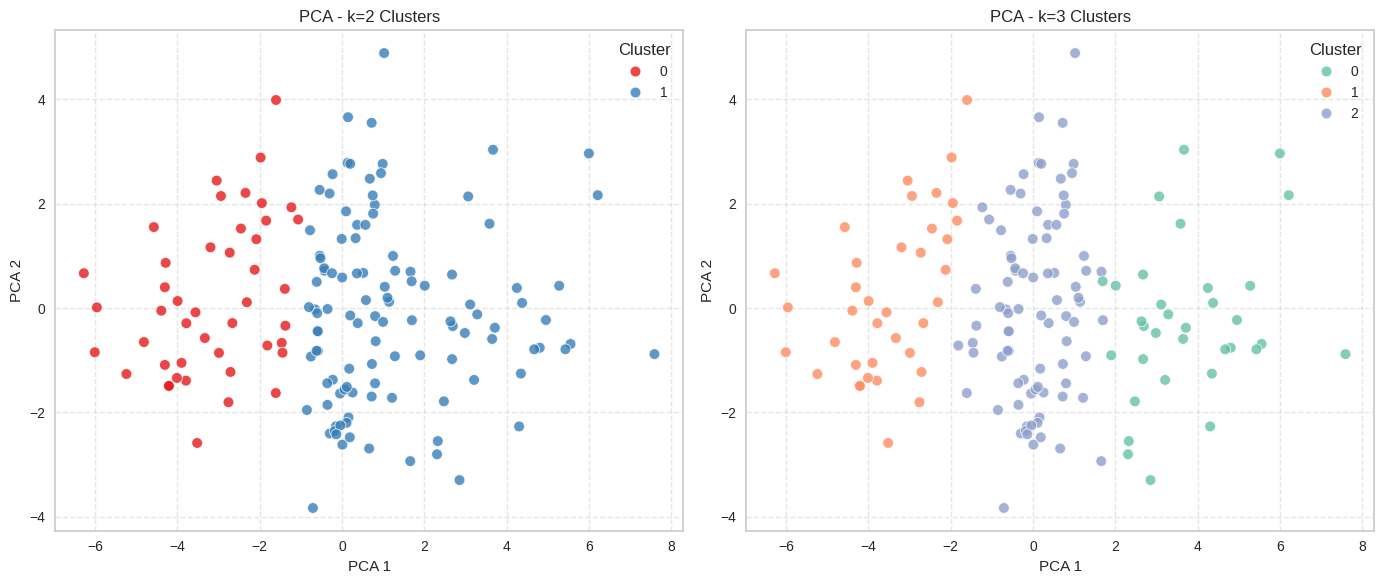

In [33]:
# PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(scaled_data)
df_k2[['PCA1', 'PCA2']] = X_pca
df_k3[['PCA1', 'PCA2']] = X_pca

# Side-by-side PCA plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_k2,
                palette='Set1', ax=axes[0], s=60, alpha=0.8)
axes[0].set_title("PCA - k=2 Clusters")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_k3,
                palette='Set2', ax=axes[1], s=60, alpha=0.8)
axes[1].set_title("PCA - k=3 Clusters")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Althought K = 2 evaluation metrics outperforms that of the k = 3 evaluation metric, k = 3 was chosen due to its diversification which suits the project scope better

### **Performing K Means Clustering**

In [34]:
# Final clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster means
print("\nMean values for each cluster:")
print(df.groupby('Cluster')[question_cols].mean())

# Demographic distribution
for col in ['Gender', 'Academic_Year', 'Field_of_Study']:
    print(f"\n{col} by Cluster:")
    print(pd.crosstab(df['Cluster'], df[col]))


Mean values for each cluster:
               Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
Cluster                                                                         
0        1.848485  1.818182  1.878788  1.606061  1.515152  1.333333  1.545455   
1        3.063830  2.893617  3.148936  3.106383  2.553191  2.382979  2.382979   
2        2.706667  2.933333  3.000000  2.280000  1.893333  2.133333  1.920000   

               Q8        Q9       Q10  ...       Q18       Q19       Q20  \
Cluster                                ...                                 
0        1.393939  1.515152  1.939394  ...  1.606061  1.575758  1.757576   
1        2.361702  2.851064  3.000000  ...  3.000000  2.978723  3.255319   
2        2.040000  1.786667  2.106667  ...  1.946667  2.120000  2.386667   

              Q21       Q22       Q23       Q24       Q25       Q26       Q27  
Cluster                                                                        
0        1.818182  2.0

### **PCA Visualization for 3 Clusters**

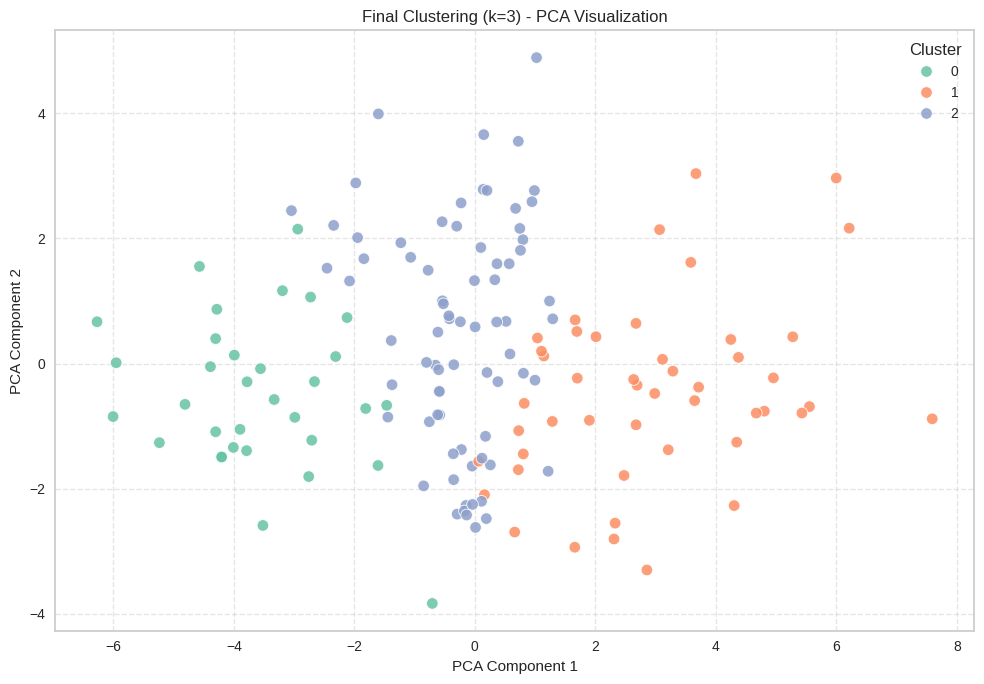

In [35]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


# Final scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster', palette='Set2', s=70, alpha=0.85)
plt.title("Final Clustering (k=3) - PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
print(f"--- Evaluation Metrics for K-Means k=3 ---")

# Silhouette Score
silhouette_avg_k3 = silhouette_score(scaled_data, cluster_labels_k3)
print(f"\nSilhouette Score: {silhouette_avg_k3:.4f}")

# Davies-Bouldin Index
dbi_score_k3 = davies_bouldin_score(scaled_data, cluster_labels_k3)
print(f"Davies-Bouldin Index: {dbi_score_k3:.4f}")

# Calinski-Harabasz Index
chi_score_k3 = calinski_harabasz_score(scaled_data, cluster_labels_k3)
print(f"Calinski-Harabasz Index: {chi_score_k3:.2f}")

--- Evaluation Metrics for K-Means k=3 ---

Silhouette Score: 0.0993
Davies-Bouldin Index: 2.4131
Calinski-Harabasz Index: 21.86


### **Radar chart**

In [37]:
import plotly.graph_objects as go
import plotly.express as px

categories = ['Academic', 'Social', 'Financial', 'Personal', 'Environmental', 'Coping']
stress_avg_cols = [
    'Academic_Stress_Avg',
    'Social_Stress_Avg',
    'Financial_Stress_Avg',
    'Personal_Stress_Avg',
    'Environmental_Stress_Avg',
    'Coping_Strategies_Avg'
]

# Define a color palette for the clusters
colors = px.colors.qualitative.Set2

for i, cluster in enumerate(sorted(df['Cluster'].unique())):
    fig = go.Figure() # Create a new figure for each cluster

    cluster_data = df[df['Cluster'] == cluster][stress_avg_cols].mean().tolist()

    # Close the loop for radar chart
    cluster_data += cluster_data[:1]

    fig.add_trace(go.Scatterpolar(
        r=cluster_data,
        theta=categories + [categories[0]],
        fill='toself',
        name=f'Cluster {cluster}',
        marker=dict(color=colors[i % len(colors)]) # Assign a color from the palette
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[1,4])
        ),
        showlegend=True,
        title=f"Stress Profile for Cluster {cluster}" # Update title for each cluster
    )

    fig.show()

# **Hierarchical Clustering - Unsupervised ML**

## **Performing hierarchical clustering**

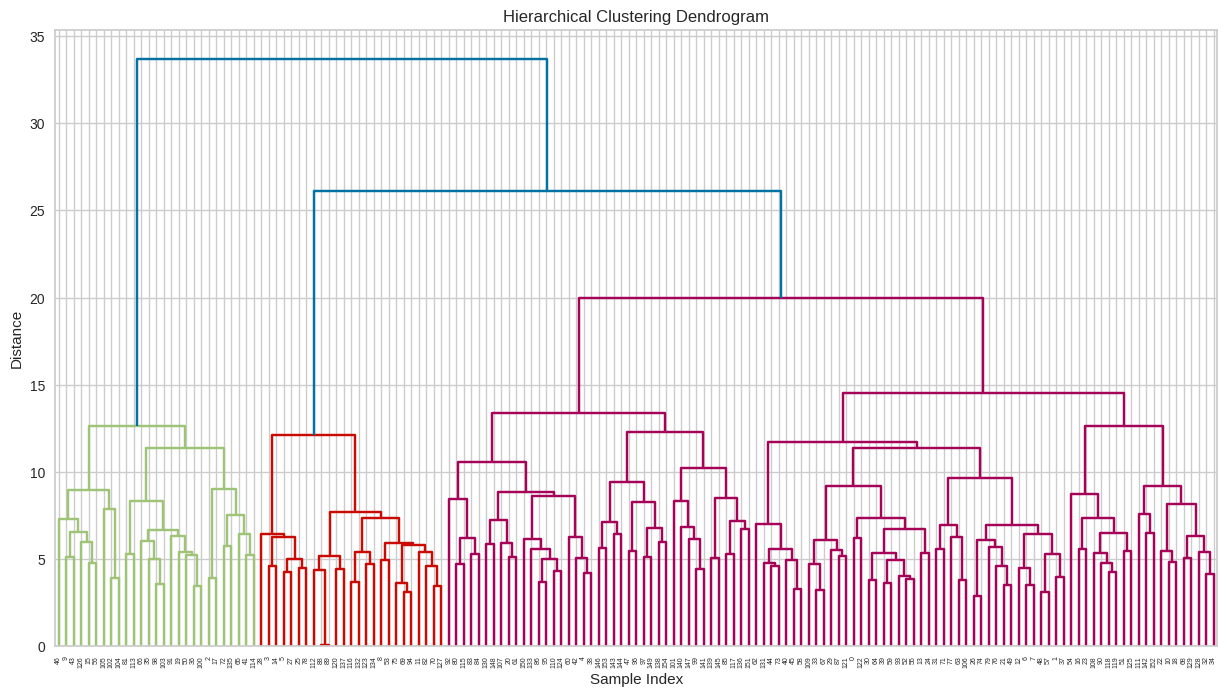

In [38]:
linked = linkage(scaled_data, method='ward') # minimises variance within clusters to ensure they have similar properties

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='decreasing',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [39]:
# Choose 3 clusters to evaluate
from scipy.cluster.hierarchy import fcluster
num_clusters_hac = 3

# Get the cluster labels by cutting the dendrogram
hac_labels = fcluster(linked, num_clusters_hac, criterion='maxclust')

### **Evaluating the model**

In [40]:
print(f"--- Evaluation Metrics for Hierarchy k=3 ---")

# Silhouette Score
silhouette_avg = silhouette_score(scaled_data, hac_labels)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Davies-Bouldin Index
dbi_score = davies_bouldin_score(scaled_data, hac_labels)
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# Calinski-Harabasz Index
chi_score = calinski_harabasz_score(scaled_data, hac_labels)
print(f"Calinski-Harabasz Index: {chi_score:.2f}")

--- Evaluation Metrics for Hierarchy k=3 ---

Silhouette Score: 0.0919
Davies-Bouldin Index: 2.1380
Calinski-Harabasz Index: 20.12


K Means Clustering's evaluation metrics of

Silhouette Score: 0.0993
Davies-Bouldin Index: 2.4131
Calinski-Harabasz Index: 21.86

outperforms that of the hierarchy clustering model's evaluation metric

### **Top Contributing Questions for Each Cluster**

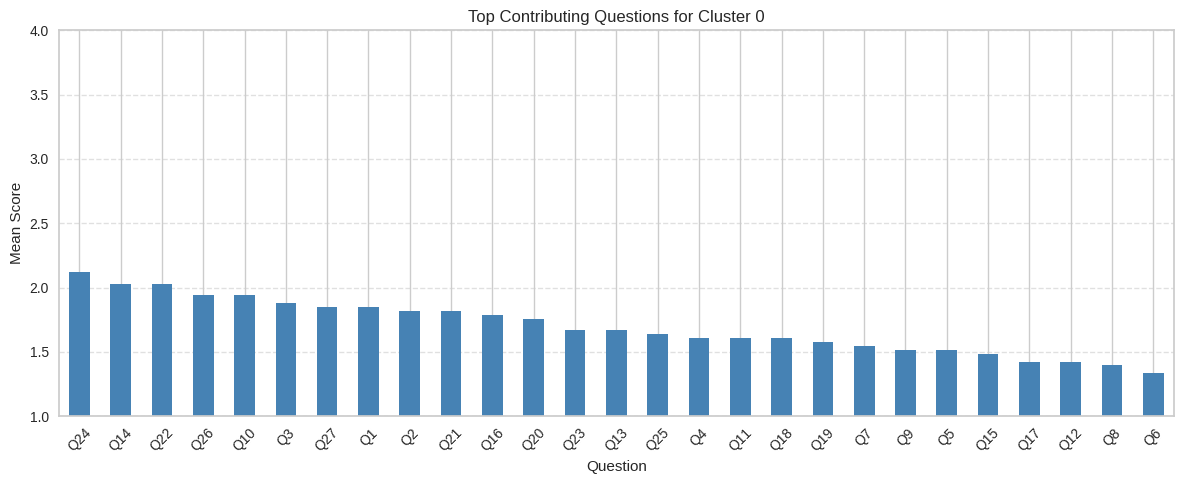

In [41]:
# Group by cluster and calculate mean of question columns
cluster_means = df.groupby('Cluster')[question_cols].mean()

# Plot for Cluster 0
plt.figure(figsize=(12, 5))
cluster_means.loc[0].sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Top Contributing Questions for Cluster 0')
plt.ylabel('Mean Score')
plt.xlabel('Question')
plt.xticks(rotation=45)
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

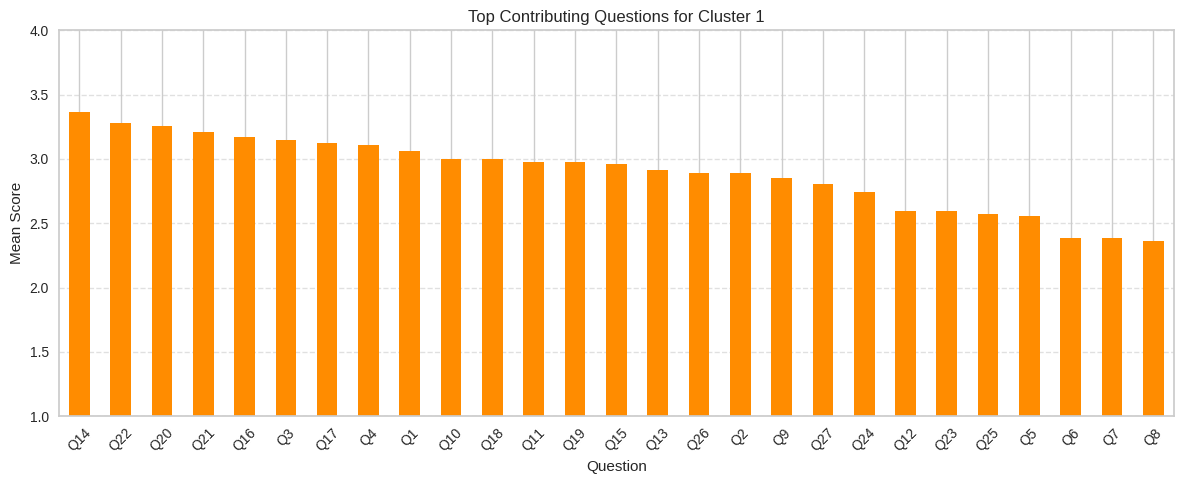

In [42]:
# Plot for Cluster 1
plt.figure(figsize=(12, 5))
cluster_means.loc[1].sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title('Top Contributing Questions for Cluster 1')
plt.ylabel('Mean Score')
plt.xlabel('Question')
plt.xticks(rotation=45)
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

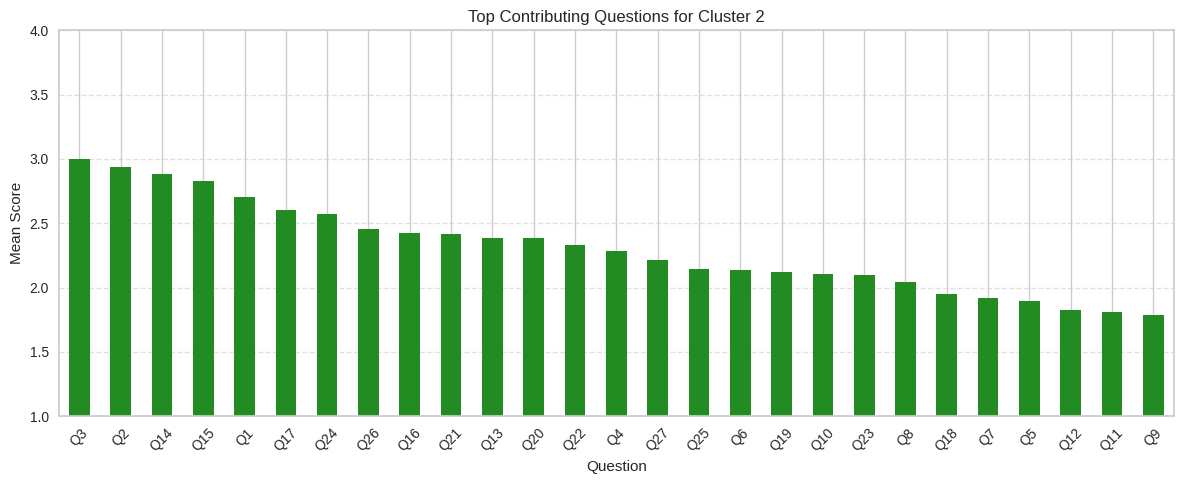

In [43]:
# Plot for Cluster 2
plt.figure(figsize=(12, 5))
cluster_means.loc[2].sort_values(ascending=False).plot(kind='bar', color='forestgreen')
plt.title('Top Contributing Questions for Cluster 2')
plt.ylabel('Mean Score')
plt.xlabel('Question')
plt.xticks(rotation=45)
plt.ylim(1, 4)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Decision Tree Classifier - Supervised ML**

### **Defining the target variables and train-test split**

In [44]:
# Define features and target
X = df[question_cols]
y = df['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **Developing the model**

In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **Evaluating the model**

In [46]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

print("--- Default Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Default Decision Tree Performance ---
Accuracy: 0.5641025641025641

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.57      0.47         7
           1       0.73      0.57      0.64        14
           2       0.56      0.56      0.56        18

    accuracy                           0.56        39
   macro avg       0.56      0.57      0.56        39
weighted avg       0.59      0.56      0.57        39



### **Confusion Matrix Plot**

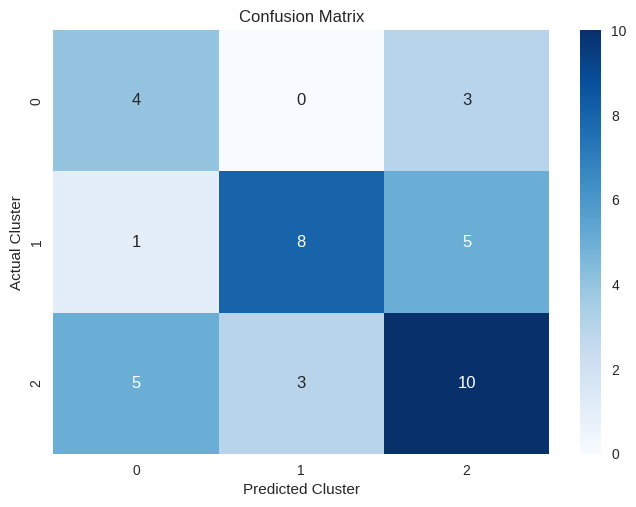

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster")
plt.show()

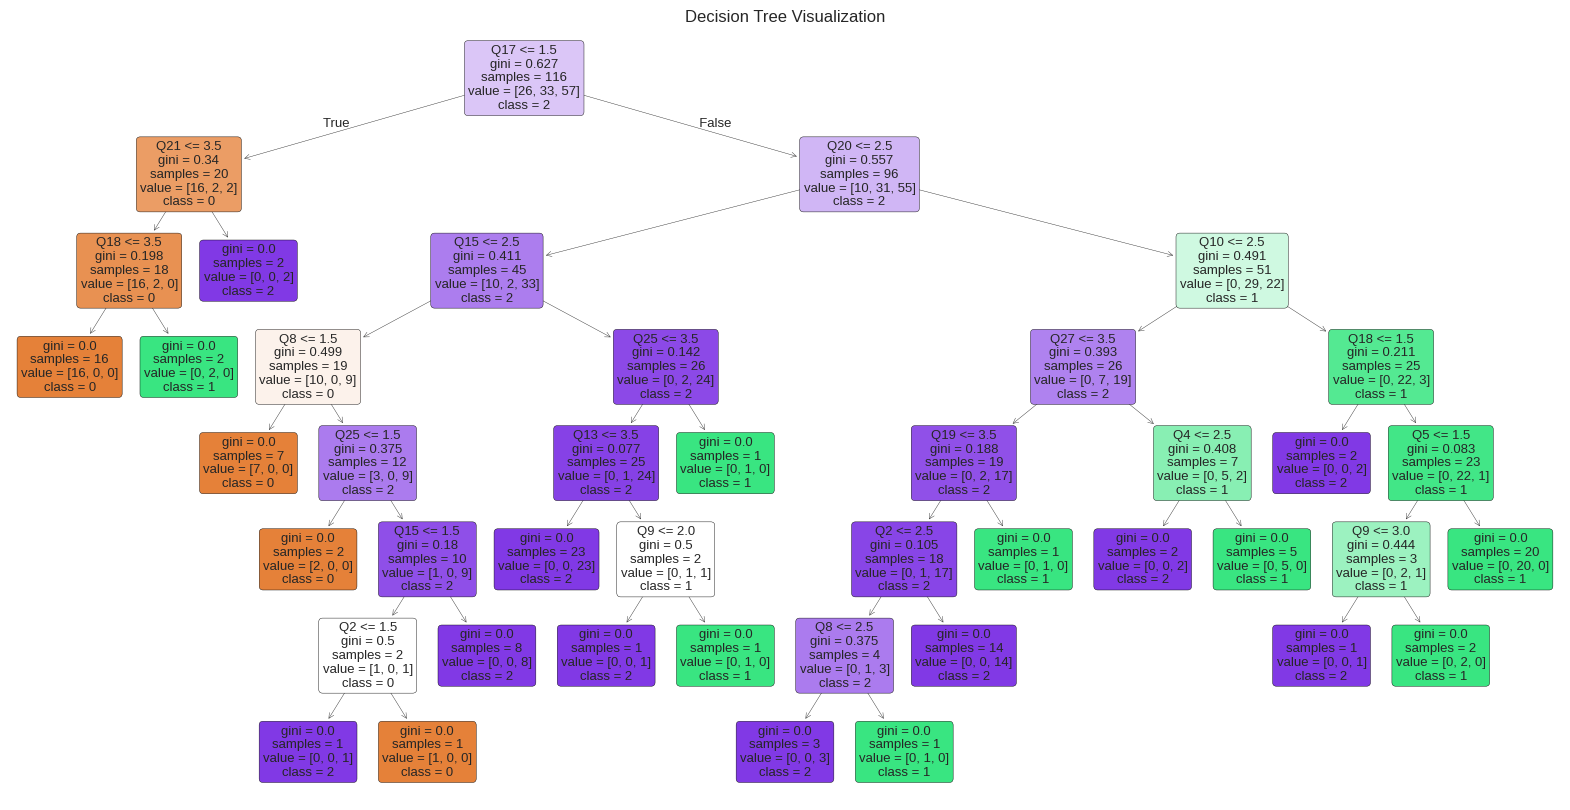

In [48]:
# Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=question_cols, class_names=[str(i) for i in sorted(df['Cluster'].unique())], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### **Feature importance for Decision Tree model**

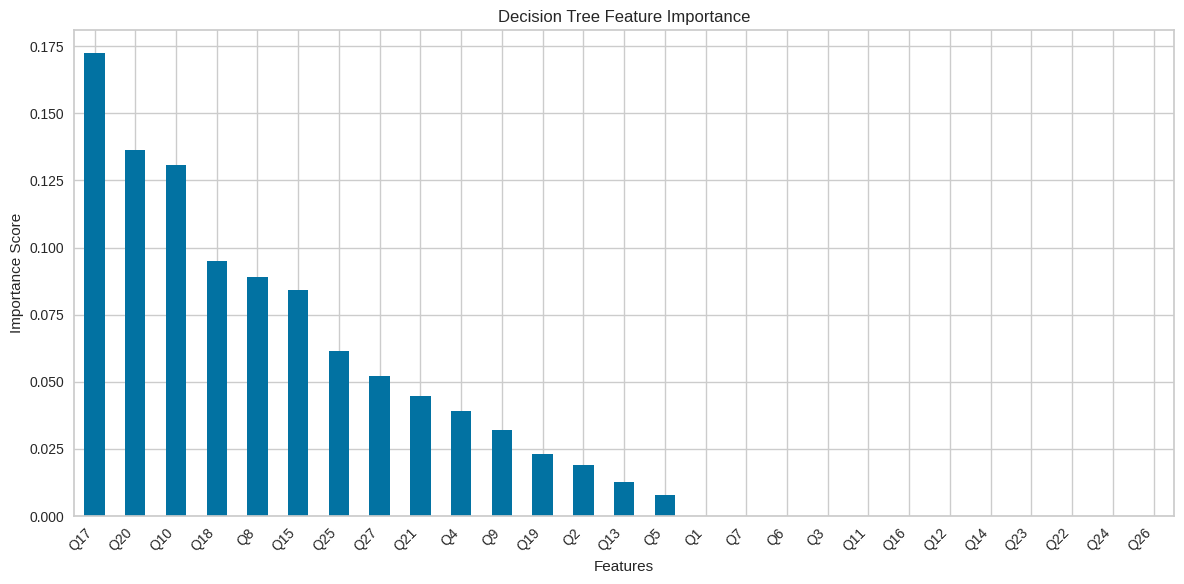

In [49]:
# Get feature importances from the Decision Tree model
dt_feature_importances = dt.feature_importances_

feature_names = X_train.columns
dt_importance_series = pd.Series(dt_feature_importances, index=feature_names)

# Plot
plt.figure(figsize=(12, 6))
dt_importance_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Logistic Regression - Supervised ML**

In [50]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200, random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

### **Evaluating the model**

In [51]:
# Make predictions on the test data
y_pred_logreg = logreg_model.predict(X_test)

print("--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

--- Logistic Regression Performance ---
Accuracy: 0.8461538461538461

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.92      0.86      0.89        14
           2       0.80      0.89      0.84        18

    accuracy                           0.85        39
   macro avg       0.85      0.82      0.83        39
weighted avg       0.85      0.85      0.85        39



### **Confusion Matrix Plot**

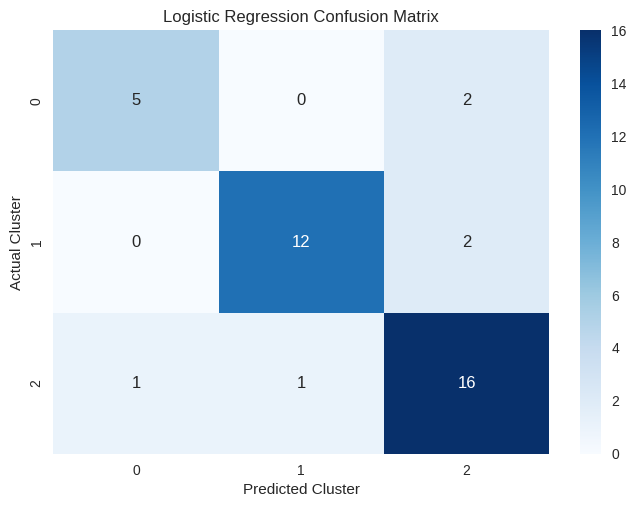

In [52]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Cluster")
plt.show()

Logistic Regression's evaluation metrics of

Accuracy: 0.9230769230769231

outperforms that of the Decision Tree Classifier's evaluation metric

### **Feature importance for Logistic Regression model**

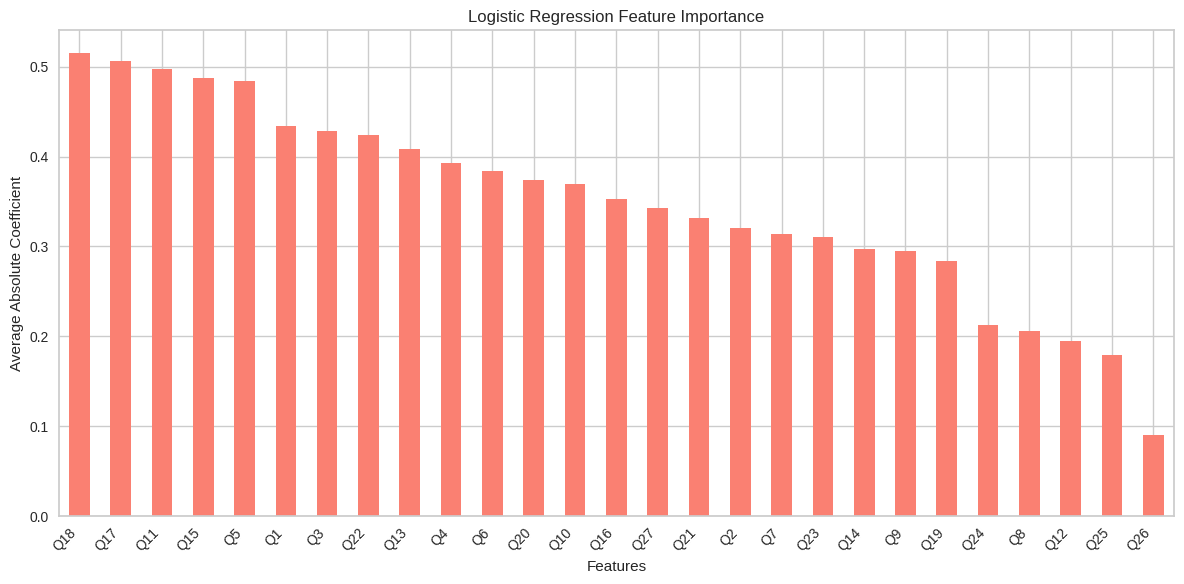

In [53]:
logreg_coefficients = logreg_model.coef_

logreg_importance_scores = np.mean(np.abs(logreg_coefficients), axis=0)


feature_names = X_train.columns
logreg_importance_series = pd.Series(logreg_importance_scores, index=feature_names)


# Plot
plt.figure(figsize=(12, 6))
logreg_importance_series.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Features")
plt.ylabel("Average Absolute Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
# First, make predictions on the entire dataset (not just X_test)
X_all = df[question_cols]  # Use question_cols instead of feature_cols
predicted_labels = logreg_model.predict(X_all)

# Add the predicted labels as a new column
df['Predicted_Cluster'] = predicted_labels

# If you haven't added the actual cluster labels yet
# Make sure 'Cluster' column exists based on your earlier KMeans results
# e.g., df['Cluster'] = kmeans.labels_

In [55]:
df.head()

,Number,Age,Gender,Field_of_Study,Employment_Status,Academic_Year,Q1,Q2,Q3,Q4,...,Q26,Q27,Academic_Stress_Avg,Social_Stress_Avg,Financial_Stress_Avg,Personal_Stress_Avg,Environmental_Stress_Avg,Coping_Strategies_Avg,Cluster,Predicted_Cluster
0,1,Above 24,Female,BDA,Yes,4th year,3,4,4,4,...,1,1,3.75,1.25,1.00,3.0,1.4,1.4,2,2
1,2,18 to 20,Female,AI & DS,Yes,3rd year,3,3,3,2,...,3,1,2.75,2.00,1.25,2.2,2.4,2.2,2,2
2,3,20 to 22,Female,CS,Yes,3rd year,4,3,4,4,...,4,2,3.75,4.00,1.75,4.0,3.6,3.6,1,1
3,4,18 to 20,Male,BIS,No,3rd year,1,1,1,1,...,1,1,1.00,1.00,1.00,1.0,2.2,1.2,0,0
4,5,20 to 22,Male,BDA,Yes,3rd year,3,2,3,2,...,3,3,2.50,1.75,2.75,2.6,2.6,2.8,1,1


# **Exporting the csv to Powerbi**

In [58]:
df.to_csv('Dataset.csv', index=False)

from google.colab import files
files.download('Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>